In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the neural network
class SinApproximator(nn.Module):
    def __init__(self, nodes=10):

        super(SinApproximator, self).__init__()
        
        self.fc = nn.Linear(2, nodes)  # Input: x, sin(x), rand()
        self.hidden = nn.ReLU()
        self.out = nn.Linear(nodes, 1)  # Output: approximated sin(x)

    def forward(self, x):
        x = self.hidden(self.fc(x))
        x = self.out(x)
        return x




/Users/scinawa/miniforge3/envs/qiskit-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# amine or chatgpt, what is the last line doing? do we want inputs and targets to be in the same tensor? unsqueeze?
# 
def generate_data(num_samples=2000):
    x = np.linspace(-2 * np.pi, 2 * np.pi, num_samples)
    
    sin_x = np.sin(x)
    noise = np.random.rand(num_samples)  # Random noise
    inputs = np.vstack([x, noise]).T  # Combine x, sin(x), and rand()
    
    targets = sin_x  # Target is sin(x)
    return torch.tensor(inputs, dtype=torch.float32), torch.tensor(targets, dtype=torch.float32).unsqueeze(1)


In [3]:

# Training function
def train(model, data, targets, num_epochs=10000, learning_rate=0.01, lambda_reg=1.0):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    weights_b = []
    losses = []

    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(data)

        # Prediction loss
        loss = criterion(outputs, targets)

        # Regularization on weights associated with random input
        #reg_loss = lambda_reg * torch.sum(model.fc.weight[:, 2]**2)  # Penalty for rand() weights
        reg_loss = 0
        total_loss = loss + reg_loss

        #print(type(total_loss.item()))
        
        losses.append(total_loss.item())

        #print(model.fc.weight.data[:,1])
        #print(type(model.fc.weight))
        #print(dir(model.fc.weight))


        weights_b.append(np.sum(model.fc.weight.data[:,1].numpy()))

        total_loss.backward()
        optimizer.step()

        #if (epoch + 1) % 100 == 0:
            #print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
    
    return weights_b, losses

1000 10
[0.49154433608055115, 0.44295576214790344, 0.4237686097621918, 0.4243195652961731, 0.42917782068252563, 0.42816227674484253, 0.4201197028160095, 0.4080972671508789, 0.3956611156463623, 0.38535359501838684, 0.378121554851532, 0.37334534525871277, 0.3694937825202942, 0.3649609386920929, 0.3589012622833252, 0.3516501188278198, 0.3441195785999298, 0.337287038564682, 0.3317559063434601, 0.3274051249027252, 0.3235977590084076, 0.3195192813873291, 0.3146781027317047, 0.3091175854206085, 0.30330249667167664, 0.29778173565864563, 0.2928563058376312, 0.2884449064731598, 0.28419309854507446, 0.27974361181259155, 0.27496394515037537, 0.26999926567077637, 0.2651129364967346, 0.26048240065574646, 0.2561056315898895, 0.2518192231655121, 0.2474733591079712, 0.2430488020181656, 0.2386428713798523, 0.23436222970485687, 0.2302328199148178, 0.22620536386966705, 0.22223688662052155, 0.21832944452762604, 0.21451735496520996, 0.2108149230480194, 0.20719760656356812, 0.2036547064781189, 0.200211882591

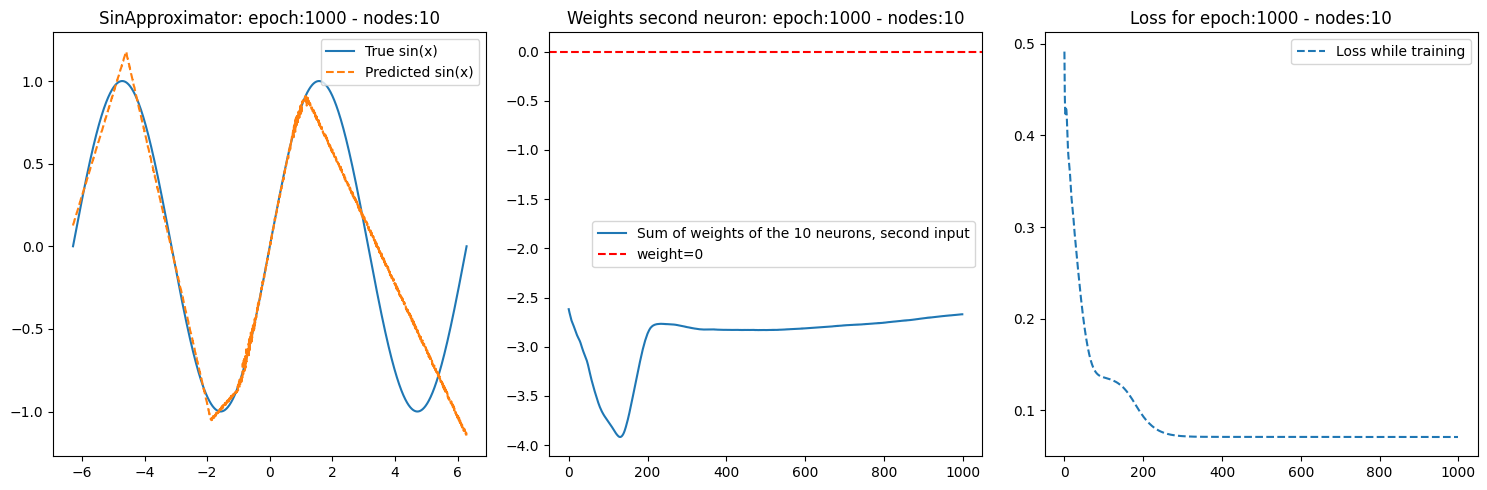

1000 20
[1.6432780027389526, 1.2765333652496338, 1.0083951950073242, 0.8256655335426331, 0.7028113007545471, 0.617469847202301, 0.5608320236206055, 0.5300094485282898, 0.5217546820640564, 0.5305249691009521, 0.5488724708557129, 0.5690619349479675, 0.5846956968307495, 0.5917755961418152, 0.588949978351593, 0.5771797299385071, 0.5588964819908142, 0.5371582508087158, 0.5147988796234131, 0.4940515458583832, 0.4761262834072113, 0.46124958992004395, 0.4490942656993866, 0.4392005503177643, 0.43128034472465515, 0.4252350628376007, 0.4209944009780884, 0.41830575466156006, 0.4166106879711151, 0.41510531306266785, 0.4129578173160553, 0.40956780314445496, 0.4047512114048004, 0.3987506031990051, 0.39204856753349304, 0.38512122631073, 0.37827184796333313, 0.3715861439704895, 0.36505967378616333, 0.35873866081237793, 0.35280683636665344, 0.34749138355255127, 0.34287309646606445, 0.3387836515903473, 0.3348642885684967, 0.3307495415210724, 0.3262677490711212, 0.32147371768951416, 0.3164951801300049, 0.

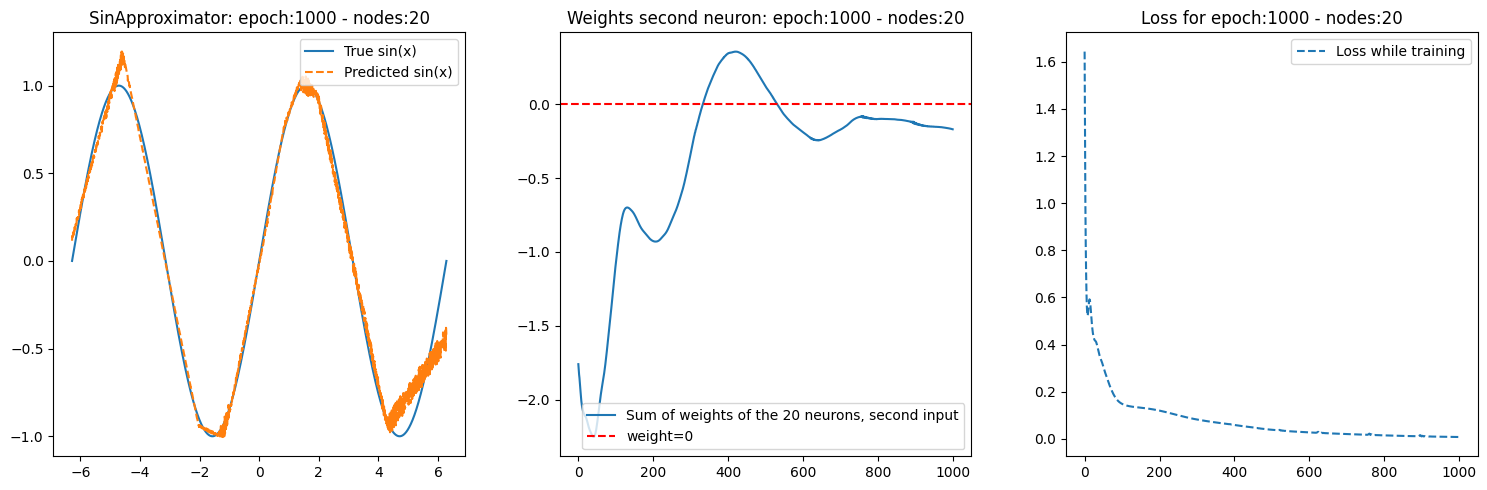

1000 30
[0.7216782569885254, 0.5422130227088928, 0.47567999362945557, 0.47954681515693665, 0.5006416440010071, 0.5091437697410583, 0.5003851652145386, 0.48118284344673157, 0.45966222882270813, 0.44077613949775696, 0.42593610286712646, 0.4146747887134552, 0.4062267541885376, 0.4000953435897827, 0.39570650458335876, 0.39213940501213074, 0.38822346925735474, 0.38281023502349854, 0.37528476119041443, 0.3660169541835785, 0.35626837611198425, 0.3476577699184418, 0.3411811590194702, 0.336818665266037, 0.33346760272979736, 0.32964837551116943, 0.3243308663368225, 0.3174978494644165, 0.31001749634742737, 0.3030240833759308, 0.29720833897590637, 0.2924708425998688, 0.28813767433166504, 0.2835169732570648, 0.27833789587020874, 0.2727752923965454, 0.2671465277671814, 0.2616109549999237, 0.2561858594417572, 0.25092852115631104, 0.2460019737482071, 0.24147877097129822, 0.2371577024459839, 0.23265326023101807, 0.22777284681797028, 0.22275079786777496, 0.21804998815059662, 0.21389944851398468, 0.21009

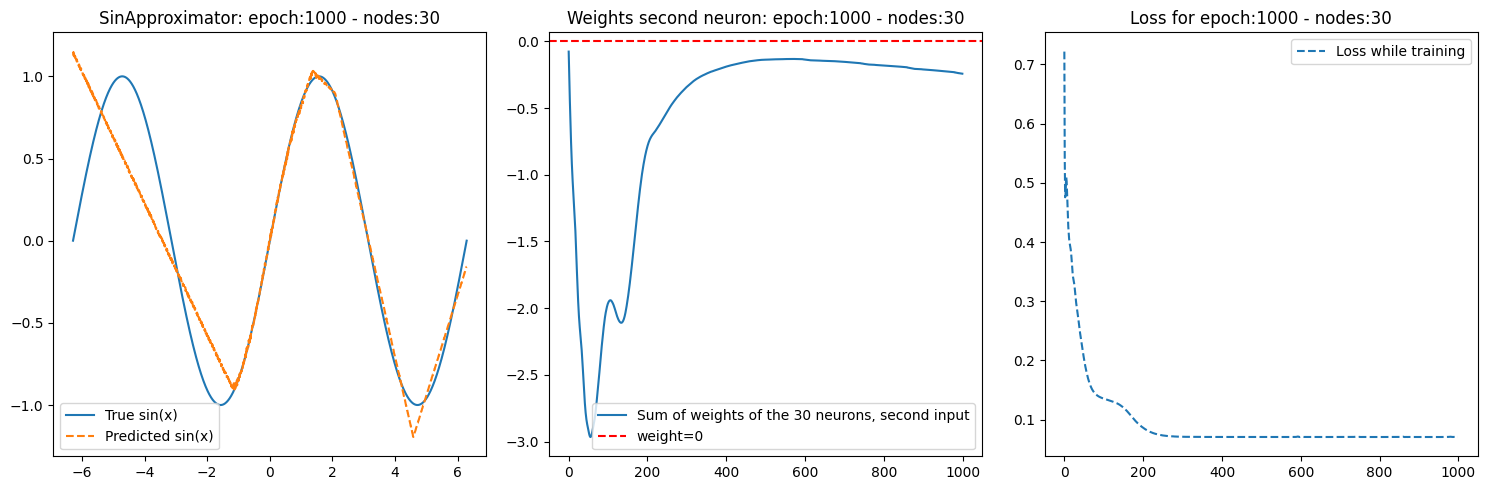

1000 40
[0.5360572934150696, 0.4707126021385193, 0.4454265534877777, 0.4661193788051605, 0.45445409417152405, 0.4179716110229492, 0.3932826817035675, 0.3887864053249359, 0.3883688449859619, 0.38057923316955566, 0.36720532178878784, 0.3532581925392151, 0.33992722630500793, 0.32788974046707153, 0.3196013569831848, 0.31502389907836914, 0.3096255362033844, 0.2994295656681061, 0.28628337383270264, 0.2754276990890503, 0.2689605951309204, 0.26392263174057007, 0.25713053345680237, 0.24886175990104675, 0.24068161845207214, 0.23283807933330536, 0.22558988630771637, 0.22001497447490692, 0.21558703482151031, 0.20995445549488068, 0.20280125737190247, 0.1964789479970932, 0.19195908308029175, 0.18782702088356018, 0.1834479570388794, 0.17915020883083344, 0.17465917766094208, 0.1704353243112564, 0.1675483137369156, 0.16508562862873077, 0.16182251274585724, 0.15863549709320068, 0.1561482697725296, 0.15399335324764252, 0.1522091031074524, 0.15030165016651154, 0.14810656011104584, 0.14657987654209137, 0.1

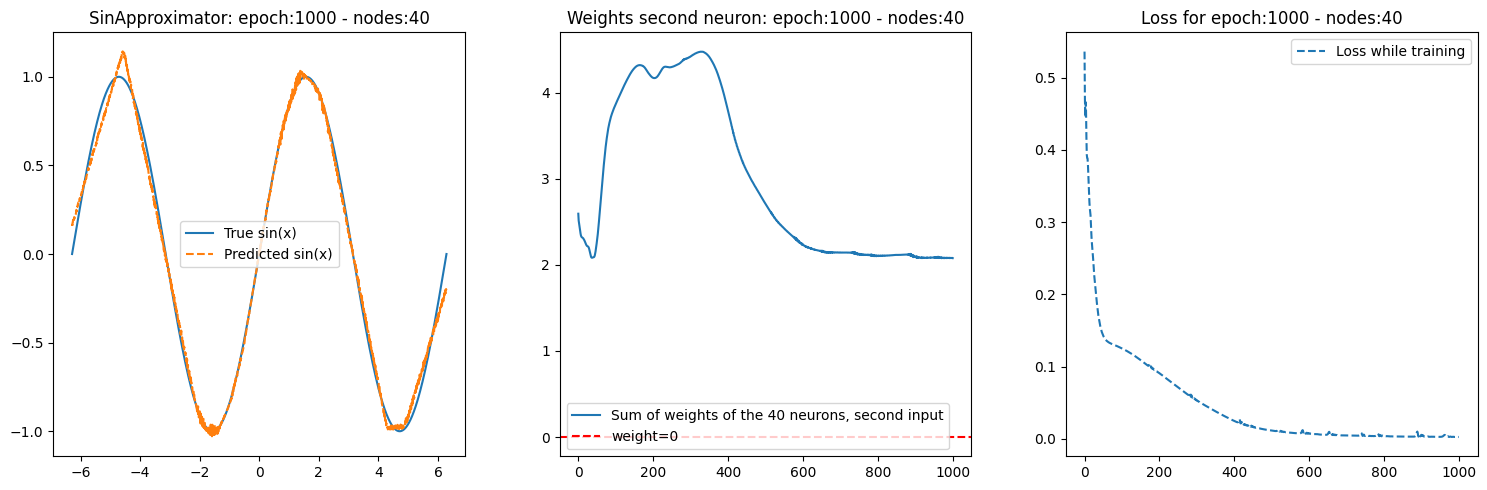

1000 50
[1.2498329877853394, 0.7462103962898254, 0.4673086106777191, 0.38835394382476807, 0.4418081045150757, 0.5233961939811707, 0.5567879676818848, 0.5290741920471191, 0.4631125330924988, 0.38868483901023865, 0.32890933752059937, 0.29551294445991516, 0.288840651512146, 0.30020445585250854, 0.31668969988822937, 0.32683587074279785, 0.3243681788444519, 0.3091420829296112, 0.28561559319496155, 0.2603314518928528, 0.23937676846981049, 0.2265310138463974, 0.2223774939775467, 0.224496990442276, 0.22869625687599182, 0.23082488775253296, 0.22834214568138123, 0.22125700116157532, 0.21106788516044617, 0.2006261646747589, 0.19236519932746887, 0.18840216100215912, 0.18814727663993835, 0.18927370011806488, 0.19018568098545074, 0.18972676992416382, 0.18688306212425232, 0.18210116028785706, 0.177160382270813, 0.17344190180301666, 0.17133307456970215, 0.17071792483329773, 0.17107684910297394, 0.1713363081216812, 0.1705152839422226, 0.16845661401748657, 0.16579236090183258, 0.16336673498153687, 0.161

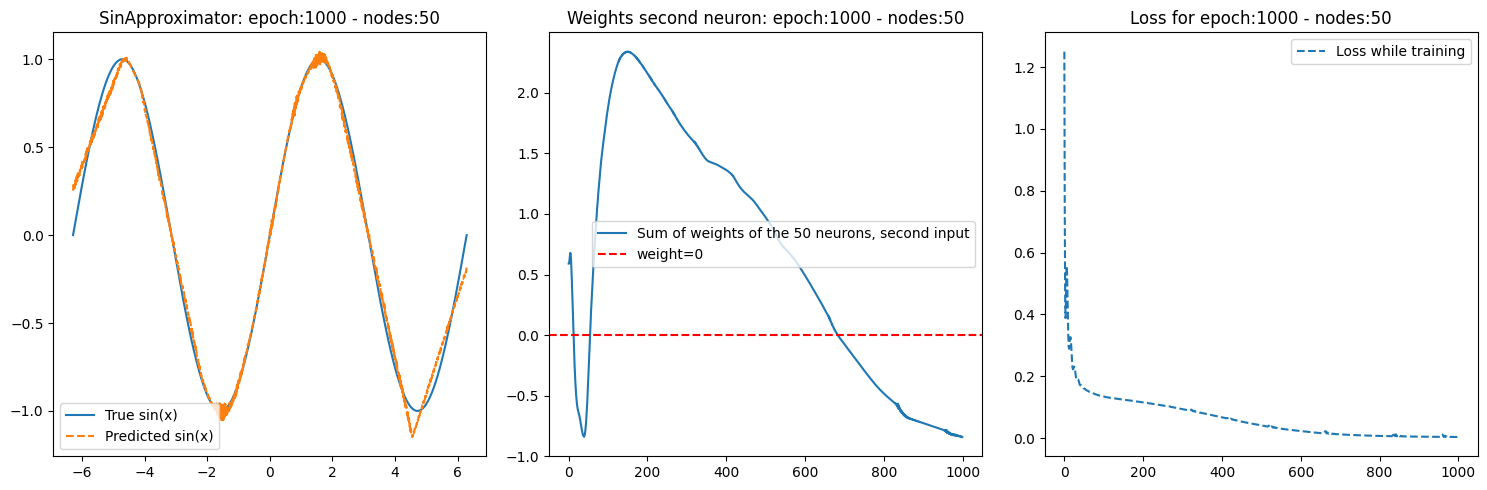

1000 60
[0.7204365134239197, 0.505507230758667, 0.5591729879379272, 0.5698707699775696, 0.5192700028419495, 0.4738304316997528, 0.4549303948879242, 0.4471819996833801, 0.4381141662597656, 0.4266047477722168, 0.41389361023902893, 0.3984604477882385, 0.37862280011177063, 0.3580781817436218, 0.34422582387924194, 0.339386522769928, 0.33669140934944153, 0.3272392451763153, 0.3098258078098297, 0.2914793789386749, 0.279705286026001, 0.27515649795532227, 0.27167460322380066, 0.2635788023471832, 0.25142866373062134, 0.23983101546764374, 0.2317107766866684, 0.2261371612548828, 0.22079028189182281, 0.21469585597515106, 0.2081606239080429, 0.2013900727033615, 0.19478356838226318, 0.189639613032341, 0.18640607595443726, 0.18319083750247955, 0.17817500233650208, 0.17263419926166534, 0.1691882163286209, 0.1676596850156784, 0.16534101963043213, 0.16154994070529938, 0.15835055708885193, 0.15671518445014954, 0.15534816682338715, 0.15337815880775452, 0.15134289860725403, 0.14969390630722046, 0.1484446674

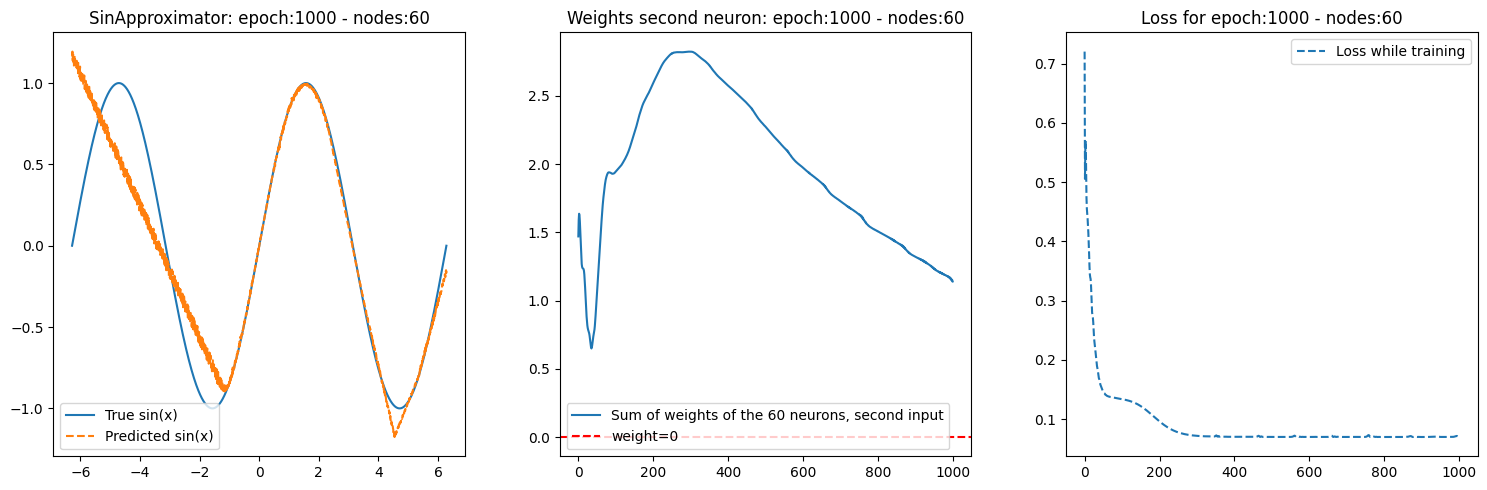

1000 70
[0.7040802836418152, 0.42965167760849, 0.4298865795135498, 0.48369327187538147, 0.44519123435020447, 0.37251055240631104, 0.3157179057598114, 0.2968653440475464, 0.30854108929634094, 0.31671178340911865, 0.30454182624816895, 0.27890533208847046, 0.25044336915016174, 0.2330697476863861, 0.23147286474704742, 0.2357700616121292, 0.2379692941904068, 0.2316223680973053, 0.21701665222644806, 0.20292328298091888, 0.19328710436820984, 0.19053131341934204, 0.19161534309387207, 0.1902521550655365, 0.18522648513317108, 0.17638836801052094, 0.16866160929203033, 0.16446469724178314, 0.16392533481121063, 0.16456277668476105, 0.16283823549747467, 0.15883426368236542, 0.15375569462776184, 0.1508844643831253, 0.1501999795436859, 0.15082228183746338, 0.14998218417167664, 0.14758218824863434, 0.14435596764087677, 0.14247845113277435, 0.14188574254512787, 0.14179885387420654, 0.1405683308839798, 0.13855212926864624, 0.13665460050106049, 0.1358688324689865, 0.13571828603744507, 0.13510408997535706,

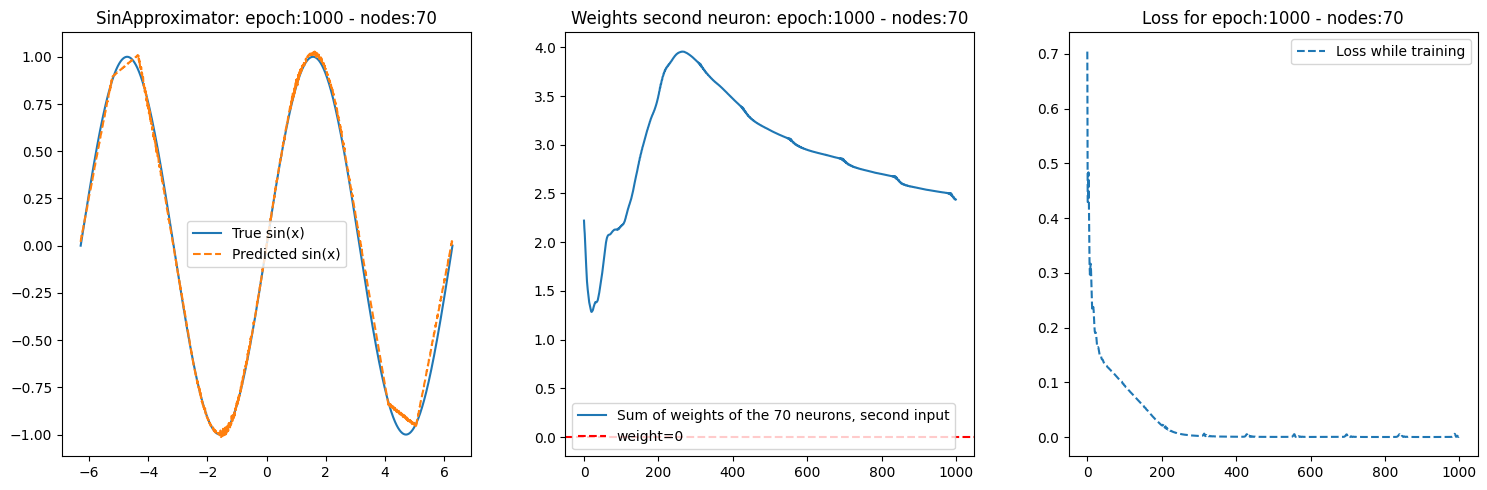

1000 80
[0.8622937202453613, 0.5923188328742981, 0.5072927474975586, 0.5592334866523743, 0.5935362577438354, 0.5359395742416382, 0.4512915015220642, 0.40440380573272705, 0.3969116806983948, 0.3988691568374634, 0.3970397710800171, 0.39207732677459717, 0.3800998032093048, 0.3547579348087311, 0.32329419255256653, 0.302235871553421, 0.29805195331573486, 0.3003079891204834, 0.2972106635570526, 0.2884097099304199, 0.27804240584373474, 0.2656914293766022, 0.25060608983039856, 0.23806466162204742, 0.23327764868736267, 0.23282760381698608, 0.22923411428928375, 0.22141684591770172, 0.21307575702667236, 0.2050658017396927, 0.19690871238708496, 0.19130025804042816, 0.1897577941417694, 0.18827612698078156, 0.18352308869361877, 0.177686408162117, 0.1729775220155716, 0.1689106822013855, 0.16621164977550507, 0.1654568910598755, 0.1639290452003479, 0.16026440262794495, 0.15687714517116547, 0.15474170446395874, 0.15312425792217255, 0.15233160555362701, 0.15142792463302612, 0.1491411179304123, 0.14705444

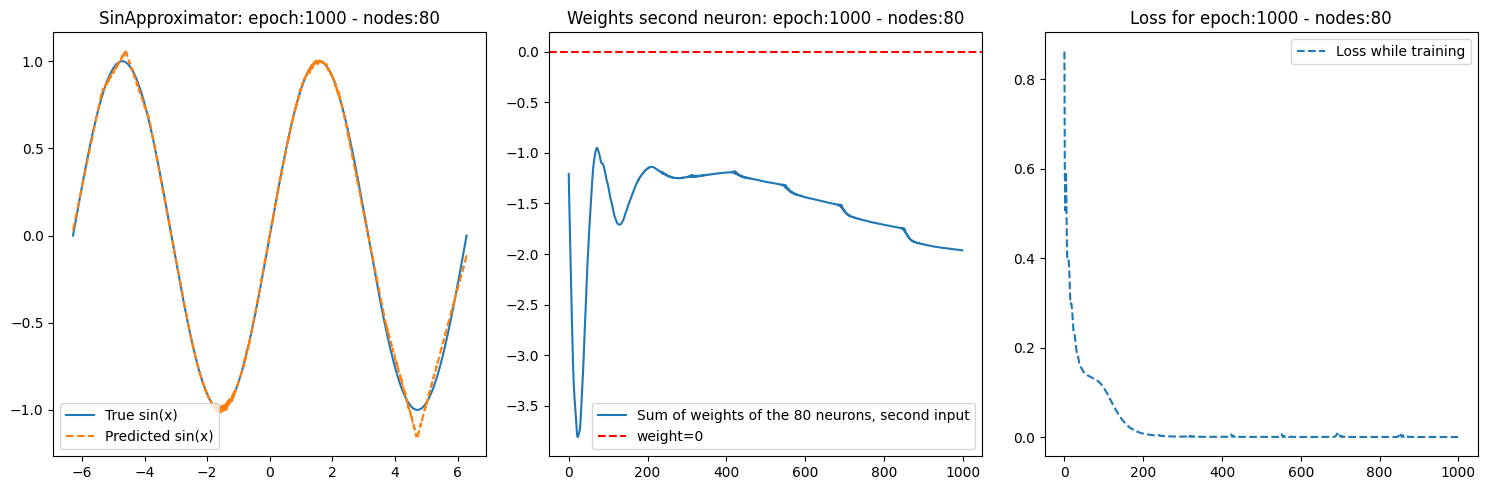

1000 90
[0.526310920715332, 0.4455859959125519, 0.4818275570869446, 0.3935754597187042, 0.3494991958141327, 0.3607807755470276, 0.36912867426872253, 0.34416571259498596, 0.30744847655296326, 0.2858487367630005, 0.28674352169036865, 0.29188933968544006, 0.2802911102771759, 0.2541019022464752, 0.2335841953754425, 0.23124583065509796, 0.23585174977779388, 0.22952766716480255, 0.2126186490058899, 0.1988881230354309, 0.19507023692131042, 0.19533514976501465, 0.19240720570087433, 0.185028538107872, 0.1761658489704132, 0.17068882286548615, 0.17082291841506958, 0.17148126661777496, 0.1668982058763504, 0.160447359085083, 0.15827369689941406, 0.15907147526741028, 0.15851369500160217, 0.155964657664299, 0.15288454294204712, 0.15136931836605072, 0.15217505395412445, 0.15202996134757996, 0.1494329273700714, 0.1476546823978424, 0.14774923026561737, 0.14771199226379395, 0.14675754308700562, 0.1451309621334076, 0.14428001642227173, 0.14462082087993622, 0.14409370720386505, 0.14278286695480347, 0.14215

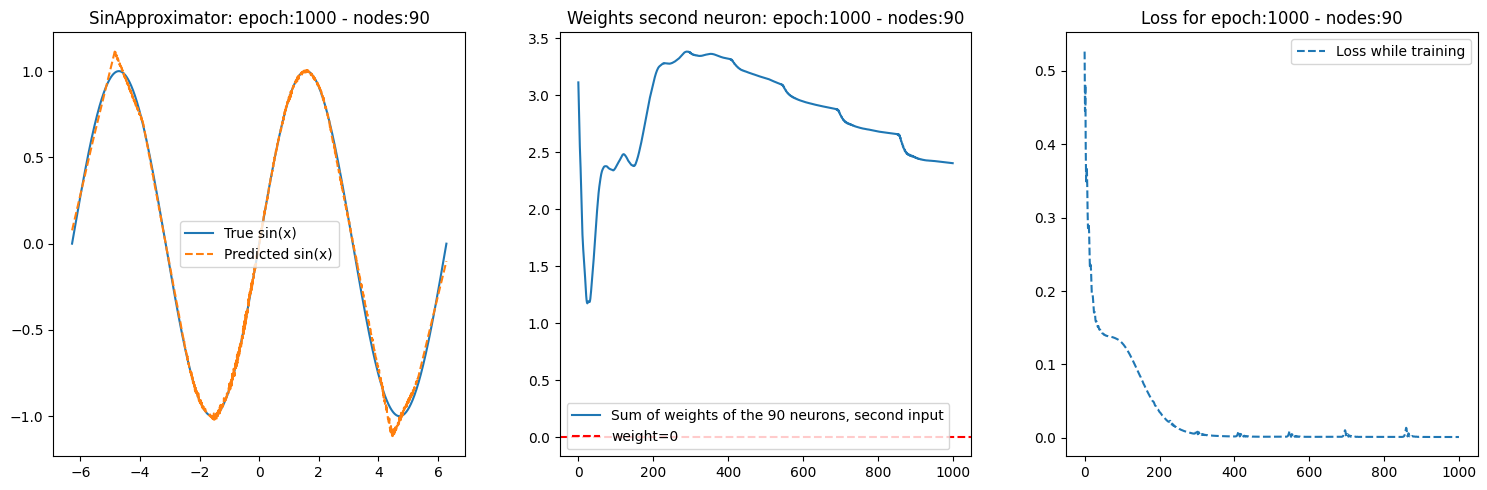

2000 10
[1.5975357294082642, 1.3557140827178955, 1.1523938179016113, 0.9853948950767517, 0.8519588708877563, 0.7487464547157288, 0.6719995737075806, 0.6176034212112427, 0.5813459753990173, 0.5590937733650208, 0.5470492839813232, 0.541951060295105, 0.5411876440048218, 0.5428017973899841, 0.5453640222549438, 0.5478763580322266, 0.549663245677948, 0.5503057241439819, 0.549598217010498, 0.5474896430969238, 0.5440309643745422, 0.539385974407196, 0.5337603688240051, 0.5273911356925964, 0.5205251574516296, 0.5134003758430481, 0.5062157511711121, 0.49916794896125793, 0.49240750074386597, 0.486080139875412, 0.4802958071231842, 0.47512224316596985, 0.47061777114868164, 0.4667614996433258, 0.4634779095649719, 0.46068352460861206, 0.4582759737968445, 0.45611223578453064, 0.4540752172470093, 0.4520505666732788, 0.4499383270740509, 0.44765526056289673, 0.44517144560813904, 0.44248443841934204, 0.43961045145988464, 0.4366205334663391, 0.4335857629776001, 0.43058305978775024, 0.42768919467926025, 0.42

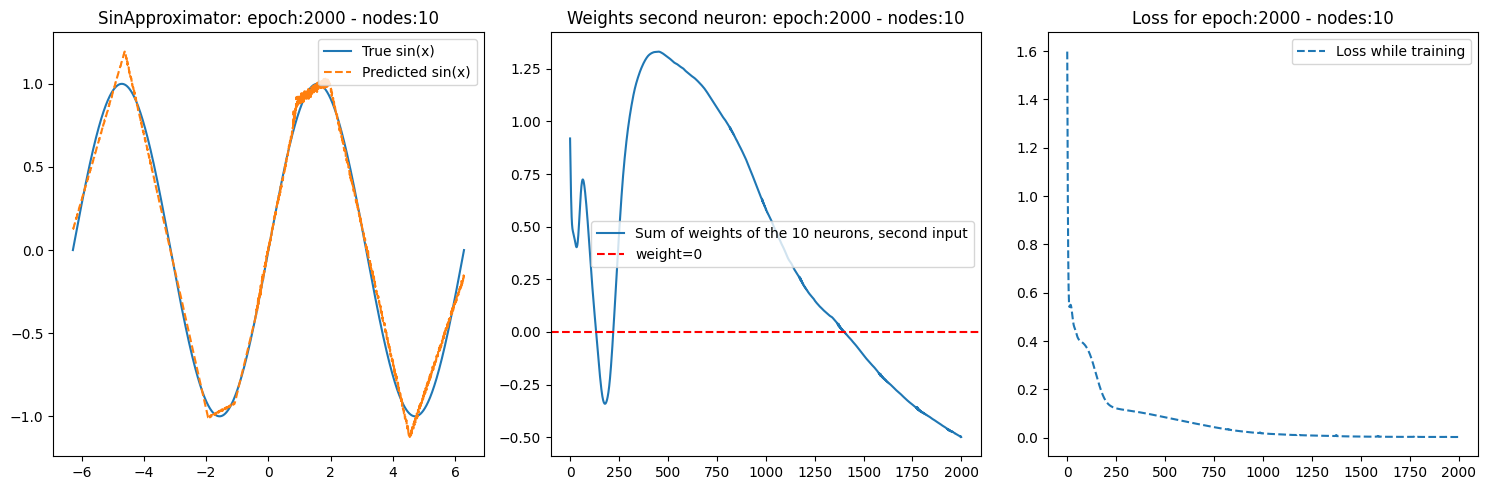

2000 20
[0.40499627590179443, 0.3752148449420929, 0.3803897798061371, 0.3717184364795685, 0.3558984696865082, 0.3446758985519409, 0.3391207754611969, 0.3331589102745056, 0.3234865367412567, 0.31217506527900696, 0.302559494972229, 0.29556185007095337, 0.2891892194747925, 0.281425416469574, 0.2723361551761627, 0.26357534527778625, 0.2563975751399994, 0.25019571185112, 0.24343231320381165, 0.23571039736270905, 0.22814728319644928, 0.22178323566913605, 0.21623443067073822, 0.21031174063682556, 0.20383964478969574, 0.1979307234287262, 0.19316616654396057, 0.18865561485290527, 0.18366307020187378, 0.17884992063045502, 0.174984410405159, 0.1715480089187622, 0.16787050664424896, 0.16439808905124664, 0.16162104904651642, 0.1591355949640274, 0.15658845007419586, 0.15428291261196136, 0.1524139642715454, 0.15073303878307343, 0.14906258881092072, 0.14757975935935974, 0.1464339643716812, 0.14534345269203186, 0.14422564208507538, 0.143412783741951, 0.14273057878017426, 0.1419489085674286, 0.141390994

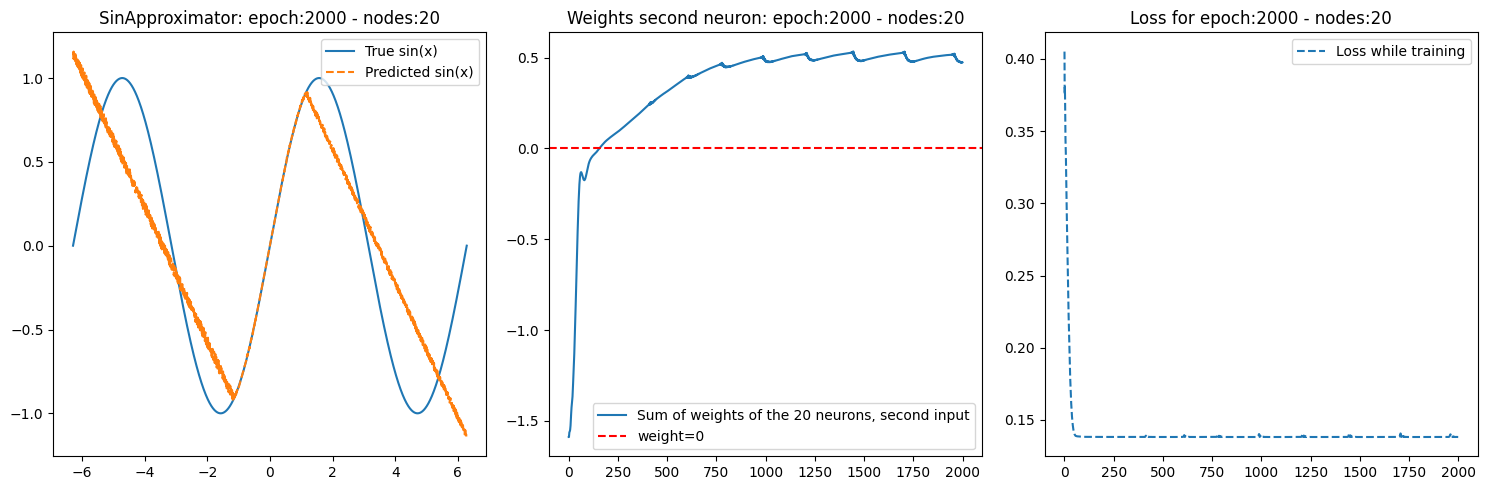

2000 30
[0.3987980782985687, 0.39929068088531494, 0.3673200011253357, 0.36356106400489807, 0.34880176186561584, 0.330716073513031, 0.321431964635849, 0.31423792243003845, 0.30251479148864746, 0.29050421714782715, 0.2823270261287689, 0.27561524510383606, 0.2670043706893921, 0.2575529217720032, 0.249801367521286, 0.2437397837638855, 0.23702430725097656, 0.22917941212654114, 0.2221083790063858, 0.21668079495429993, 0.21134203672409058, 0.20497938990592957, 0.19895455241203308, 0.19432774186134338, 0.18985497951507568, 0.18460744619369507, 0.17991961538791656, 0.17638471722602844, 0.17247873544692993, 0.16810615360736847, 0.1646190881729126, 0.1614934355020523, 0.15788987278938293, 0.1546248495578766, 0.1518540382385254, 0.14891023933887482, 0.1459513008594513, 0.14330340921878815, 0.1407933384180069, 0.13813628256320953, 0.13565872609615326, 0.13338124752044678, 0.13077886402606964, 0.12840840220451355, 0.1262274980545044, 0.12403486669063568, 0.12225416302680969, 0.12070100754499435, 0.1

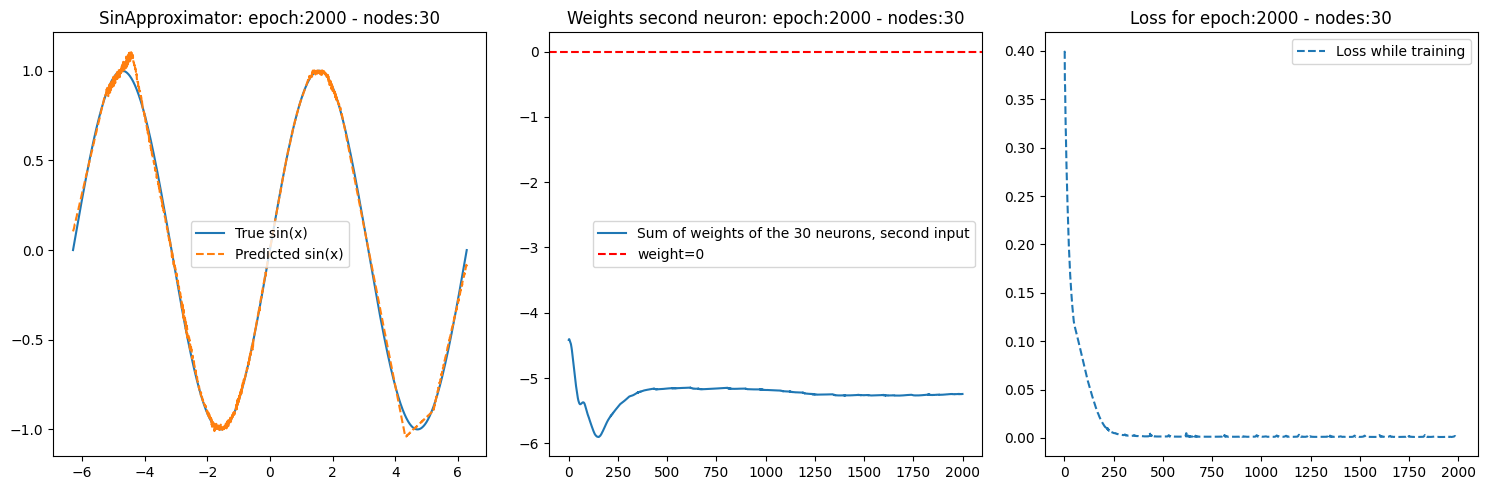

2000 40
[0.40968838334083557, 0.40821343660354614, 0.3768553137779236, 0.3630000352859497, 0.35599175095558167, 0.3407914638519287, 0.32299941778182983, 0.31114861369132996, 0.3024922013282776, 0.29085972905158997, 0.27674728631973267, 0.2635645270347595, 0.2538176476955414, 0.24479597806930542, 0.23404863476753235, 0.22241847217082977, 0.21228142082691193, 0.20440292358398438, 0.19650082290172577, 0.1878286749124527, 0.17945553362369537, 0.1730031818151474, 0.16747047007083893, 0.16163678467273712, 0.15577881038188934, 0.15129555761814117, 0.14785997569561005, 0.14426785707473755, 0.1407102346420288, 0.13803650438785553, 0.13623328506946564, 0.13434584438800812, 0.13243785500526428, 0.13120712339878082, 0.1303565949201584, 0.12919111549854279, 0.12807942926883698, 0.12743470072746277, 0.1267281323671341, 0.1257478892803192, 0.12508951127529144, 0.12490284442901611, 0.1246732547879219, 0.1236434280872345, 0.12180288881063461, 0.12111116200685501, 0.1209399402141571, 0.1195959746837616,

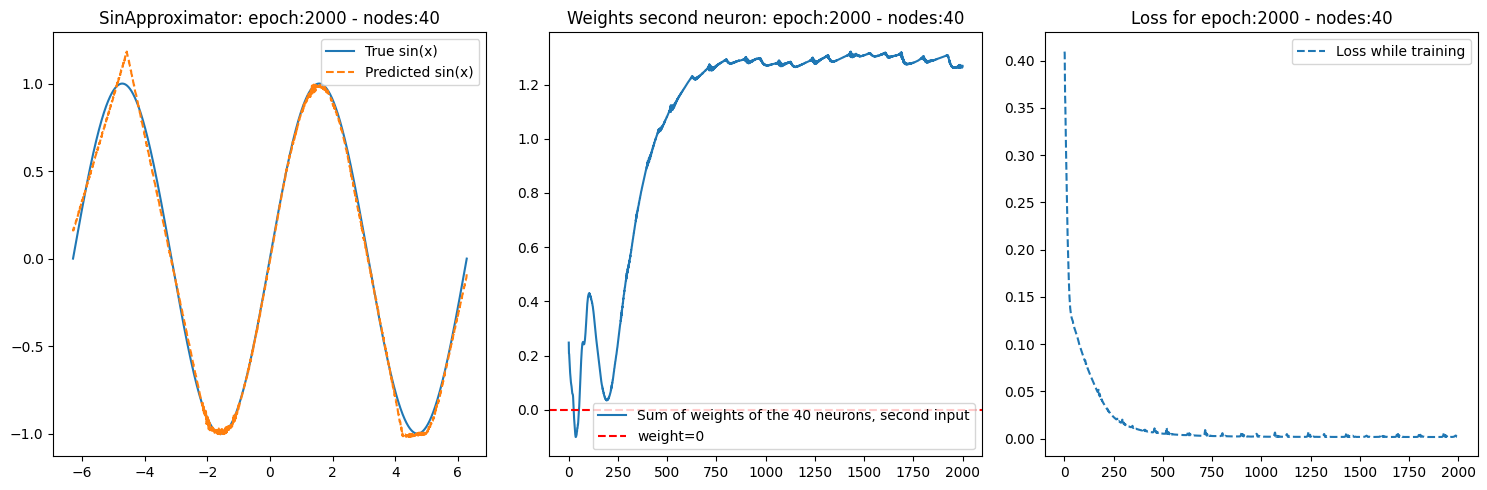

2000 50
[0.8648077249526978, 0.4977574646472931, 0.4465548098087311, 0.5207103490829468, 0.5551794171333313, 0.5254420042037964, 0.4729039967060089, 0.4313115179538727, 0.40943798422813416, 0.40280798077583313, 0.40455833077430725, 0.40793493390083313, 0.40765145421028137, 0.4007960855960846, 0.3867935538291931, 0.3680574893951416, 0.3498936593532562, 0.33781537413597107, 0.33405187726020813, 0.3359726071357727, 0.3375953137874603, 0.33355626463890076, 0.32265937328338623, 0.3082415759563446, 0.2954454720020294, 0.28768816590309143, 0.28470858931541443, 0.28328821063041687, 0.27995479106903076, 0.27339017391204834, 0.2647702693939209, 0.25625279545783997, 0.249259814620018, 0.24385932087898254, 0.23936648666858673, 0.23513177037239075, 0.23071973025798798, 0.22574679553508759, 0.2200058251619339, 0.2138623297214508, 0.20832011103630066, 0.2042183130979538, 0.20128069818019867, 0.1982261687517166, 0.19409514963626862, 0.18924860656261444, 0.18490201234817505, 0.1817328780889511, 0.17928

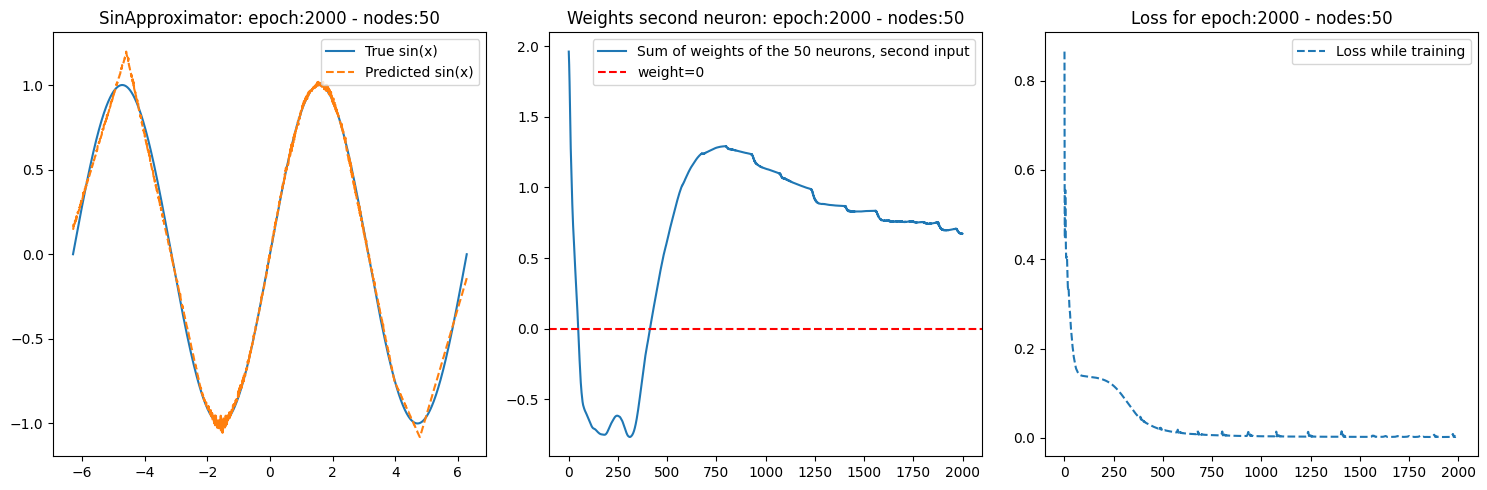

2000 60
[1.2053323984146118, 0.6047480702400208, 0.42586448788642883, 0.45352983474731445, 0.5344245433807373, 0.5672042965888977, 0.5406804084777832, 0.4835366904735565, 0.41781431436538696, 0.3618788719177246, 0.33158308267593384, 0.3315821588039398, 0.3521978557109833, 0.37457314133644104, 0.381215363740921, 0.3657160699367523, 0.33468738198280334, 0.30167457461357117, 0.2786981761455536, 0.2702866196632385, 0.27262163162231445, 0.2778052091598511, 0.2795400321483612, 0.2758190929889679, 0.26788023114204407, 0.2577059864997864, 0.24661944806575775, 0.23585131764411926, 0.2273922562599182, 0.22318463027477264, 0.22322022914886475, 0.22473548352718353, 0.22389830648899078, 0.21882463991641998, 0.21097534894943237, 0.20353828370571136, 0.19859187304973602, 0.19589711725711823, 0.19414395093917847, 0.19259709119796753, 0.19112922251224518, 0.18925130367279053, 0.18610158562660217, 0.18172283470630646, 0.1775665283203125, 0.17507080733776093, 0.17406901717185974, 0.17320559918880463, 0.1

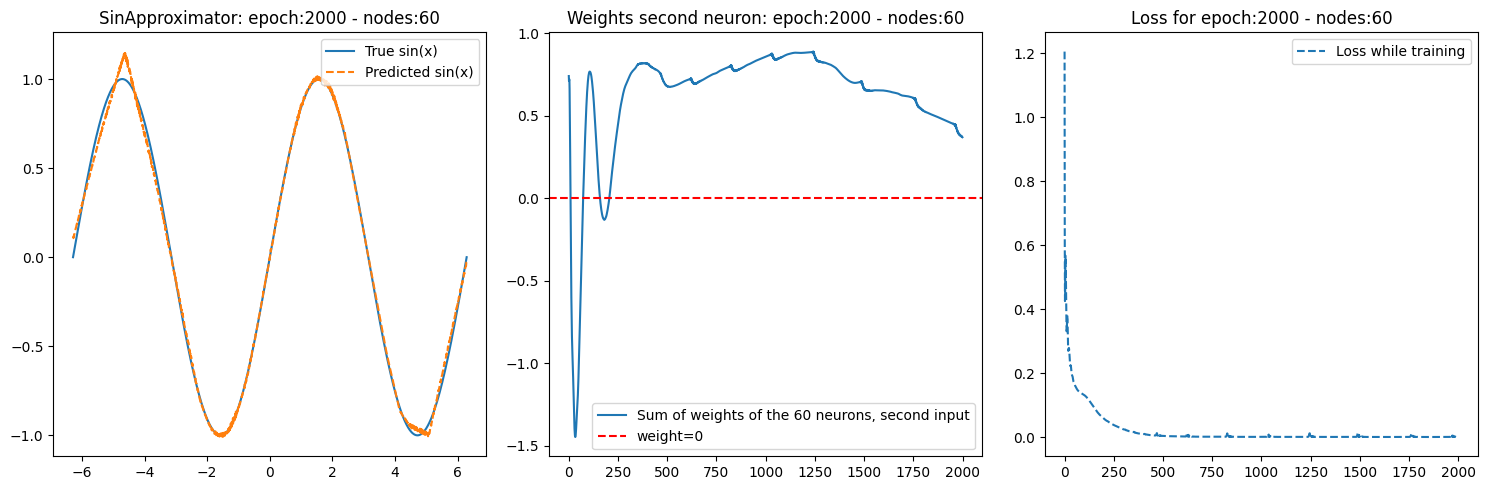

2000 70
[1.7038198709487915, 1.0793753862380981, 0.5876718759536743, 0.4748798906803131, 0.5494065284729004, 0.6431983113288879, 0.7003888487815857, 0.7099927663803101, 0.6687608957290649, 0.5829131603240967, 0.4852153956890106, 0.41328731179237366, 0.384105384349823, 0.3878980576992035, 0.4033782482147217, 0.4167233109474182, 0.42485511302948, 0.4275686740875244, 0.4213704466819763, 0.40193119645118713, 0.37167462706565857, 0.34073537588119507, 0.3190758526325226, 0.3089935779571533, 0.3058217763900757, 0.3047543168067932, 0.3047906458377838, 0.3059881627559662, 0.30546966195106506, 0.2989252507686615, 0.2862074673175812, 0.2722669541835785, 0.26139339804649353, 0.25328099727630615, 0.2465028613805771, 0.24210430681705475, 0.2409684807062149, 0.24059420824050903, 0.23759977519512177, 0.23208731412887573, 0.22611825168132782, 0.21990099549293518, 0.21294130384922028, 0.20691634714603424, 0.20348134636878967, 0.20138514041900635, 0.1989896595478058, 0.19662810862064362, 0.19411073625087

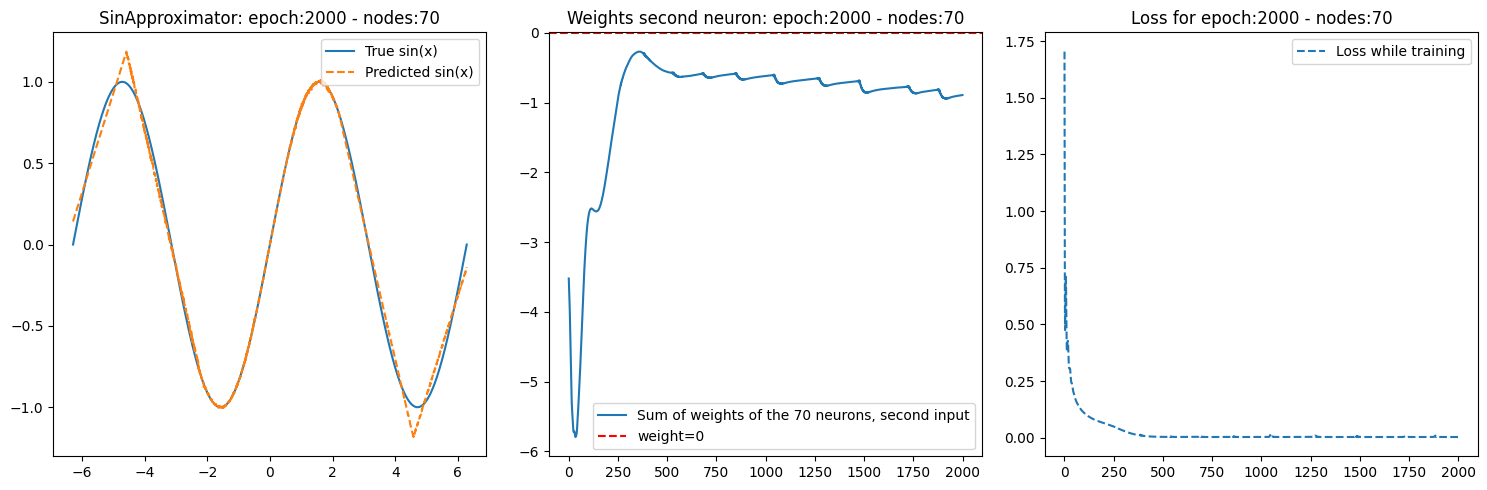

2000 80
[0.6183145642280579, 0.5911053419113159, 0.5748133659362793, 0.5368167757987976, 0.47869905829429626, 0.4526216387748718, 0.46005451679229736, 0.4525560736656189, 0.4127936065196991, 0.3724839389324188, 0.3620394468307495, 0.36993709206581116, 0.3630780875682831, 0.3340713679790497, 0.30538132786750793, 0.2961939573287964, 0.29941993951797485, 0.2941873371601105, 0.2748238444328308, 0.25493571162223816, 0.24681048095226288, 0.2463354468345642, 0.2410837560892105, 0.22828151285648346, 0.21620580554008484, 0.21029482781887054, 0.20697490870952606, 0.2016470581293106, 0.19486688077449799, 0.18847329914569855, 0.18302477896213531, 0.1794108897447586, 0.17707428336143494, 0.1732601672410965, 0.16761280596256256, 0.1639806628227234, 0.16332535445690155, 0.16124045848846436, 0.15647271275520325, 0.15336841344833374, 0.15284816920757294, 0.15098197758197784, 0.1475575715303421, 0.14553193747997284, 0.14444205164909363, 0.1427297294139862, 0.140865296125412, 0.13910649716854095, 0.13771

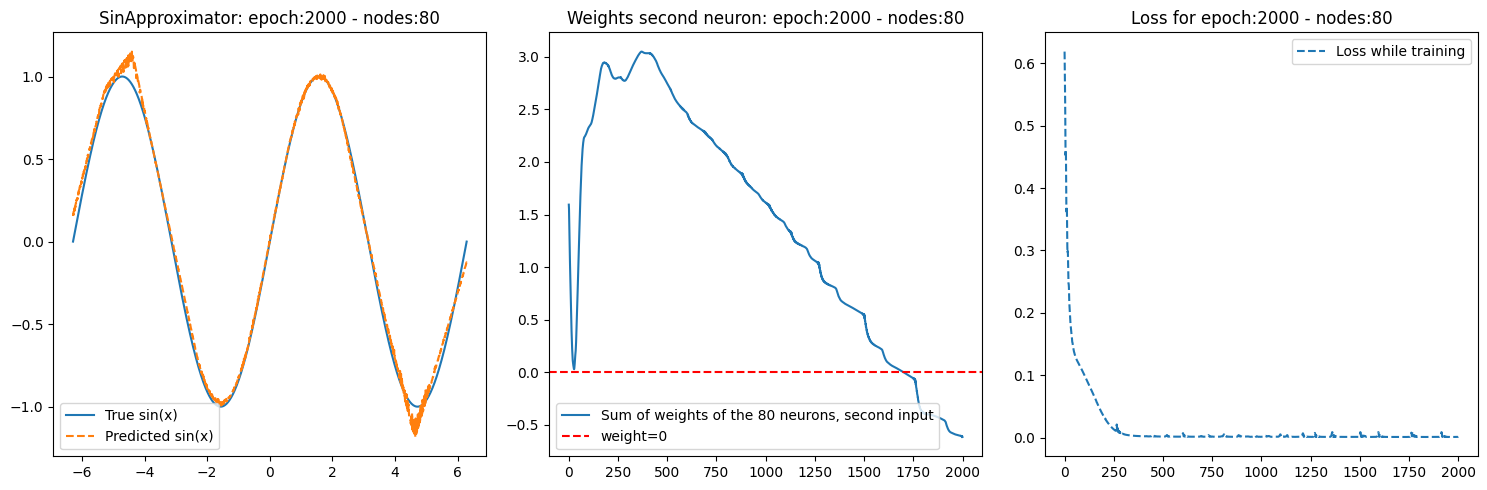

2000 90
[0.5931904315948486, 0.45993560552597046, 0.5319194197654724, 0.4507772922515869, 0.3902326226234436, 0.3959899842739105, 0.40775150060653687, 0.38846877217292786, 0.3549046814441681, 0.3319154381752014, 0.3229526877403259, 0.3196698725223541, 0.3127284049987793, 0.2984120547771454, 0.27941036224365234, 0.2630304992198944, 0.2560674250125885, 0.25527819991111755, 0.24936728179454803, 0.2340552806854248, 0.21830260753631592, 0.21219654381275177, 0.21281476318836212, 0.20889320969581604, 0.19805654883384705, 0.18836674094200134, 0.184354767203331, 0.18245889246463776, 0.1791607290506363, 0.17445310950279236, 0.16872461140155792, 0.1639043092727661, 0.16261900961399078, 0.16193778812885284, 0.1577211618423462, 0.15298739075660706, 0.15156087279319763, 0.1508927345275879, 0.14875423908233643, 0.14623874425888062, 0.1438213288784027, 0.14247560501098633, 0.1421358436346054, 0.1402723342180252, 0.1378195583820343, 0.13707050681114197, 0.13646599650382996, 0.1351889818906784, 0.133884

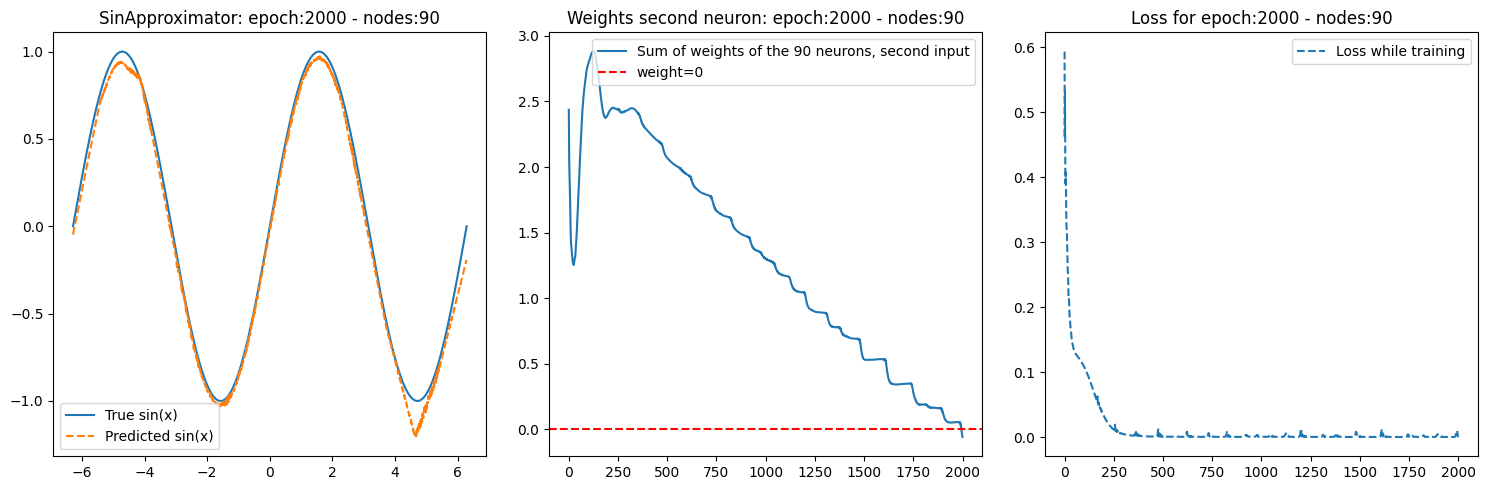

3000 10
[1.5336272716522217, 1.3005850315093994, 1.1011260747909546, 0.9313389658927917, 0.7896551489830017, 0.6745783090591431, 0.5842087268829346, 0.5161532163619995, 0.4676195979118347, 0.4357641041278839, 0.4176674783229828, 0.41051238775253296, 0.4114508032798767, 0.41754859685897827, 0.42610618472099304, 0.43476346135139465, 0.441648006439209, 0.44554218649864197, 0.4458387494087219, 0.4424835741519928, 0.4356633722782135, 0.42585793137550354, 0.41376999020576477, 0.40023764967918396, 0.3860565423965454, 0.3718884587287903, 0.3582936227321625, 0.34569209814071655, 0.3343609869480133, 0.3244323432445526, 0.31588876247406006, 0.3086070418357849, 0.3023710250854492, 0.29694274067878723, 0.29206761717796326, 0.2874959707260132, 0.28301024436950684, 0.278442919254303, 0.273711234331131, 0.26877766847610474, 0.2636520266532898, 0.2583995461463928, 0.2531258761882782, 0.24794836342334747, 0.24297557771205902, 0.2383306622505188, 0.23410634696483612, 0.23035068809986115, 0.22708109021186

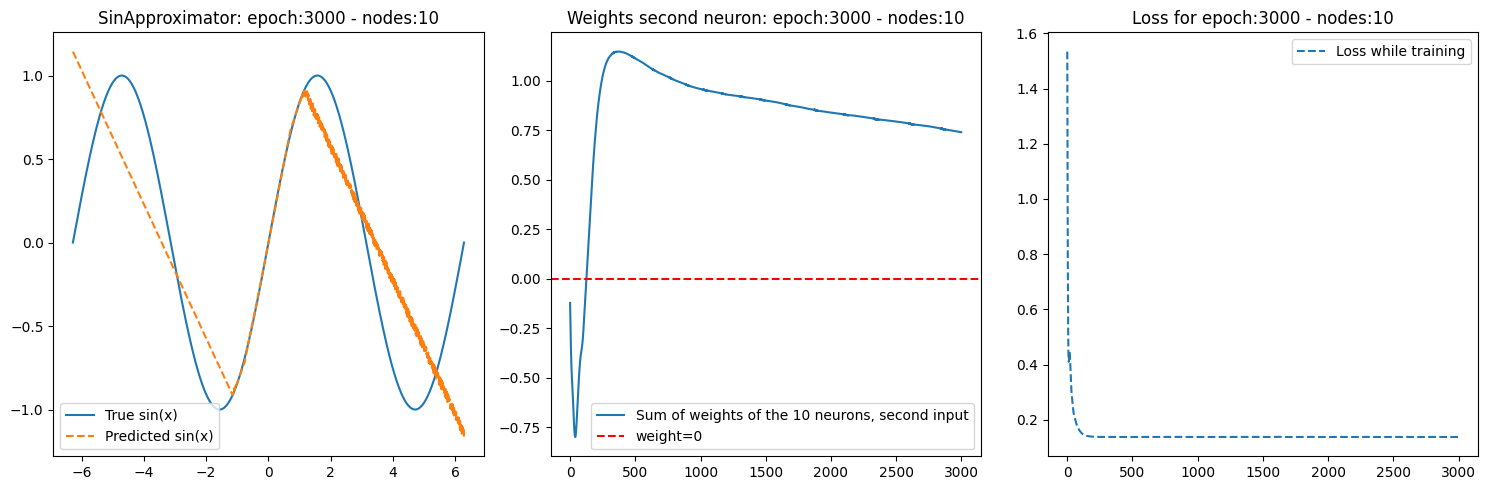

3000 20
[0.7806957960128784, 0.6310274004936218, 0.5412786602973938, 0.5012617111206055, 0.49264681339263916, 0.4975033104419708, 0.5037755370140076, 0.5050808191299438, 0.4998599886894226, 0.48938173055648804, 0.47582122683525085, 0.46107563376426697, 0.44646838307380676, 0.4328494966030121, 0.4208414852619171, 0.41091254353523254, 0.4033200144767761, 0.39795026183128357, 0.3942089378833771, 0.39116743206977844, 0.3878098726272583, 0.38336026668548584, 0.37750500440597534, 0.370443731546402, 0.3627464771270752, 0.35511866211891174, 0.3481296896934509, 0.34202635288238525, 0.33670732378959656, 0.33189868927001953, 0.32737281918525696, 0.32302606105804443, 0.3188318908214569, 0.3147173523902893, 0.3105047345161438, 0.3059939444065094, 0.3011285364627838, 0.296074777841568, 0.29112130403518677, 0.2864791750907898, 0.282156378030777, 0.27802324295043945, 0.2739882469177246, 0.2700844705104828, 0.26635506749153137, 0.2627032995223999, 0.2589506208896637, 0.2550292909145355, 0.2510556578636

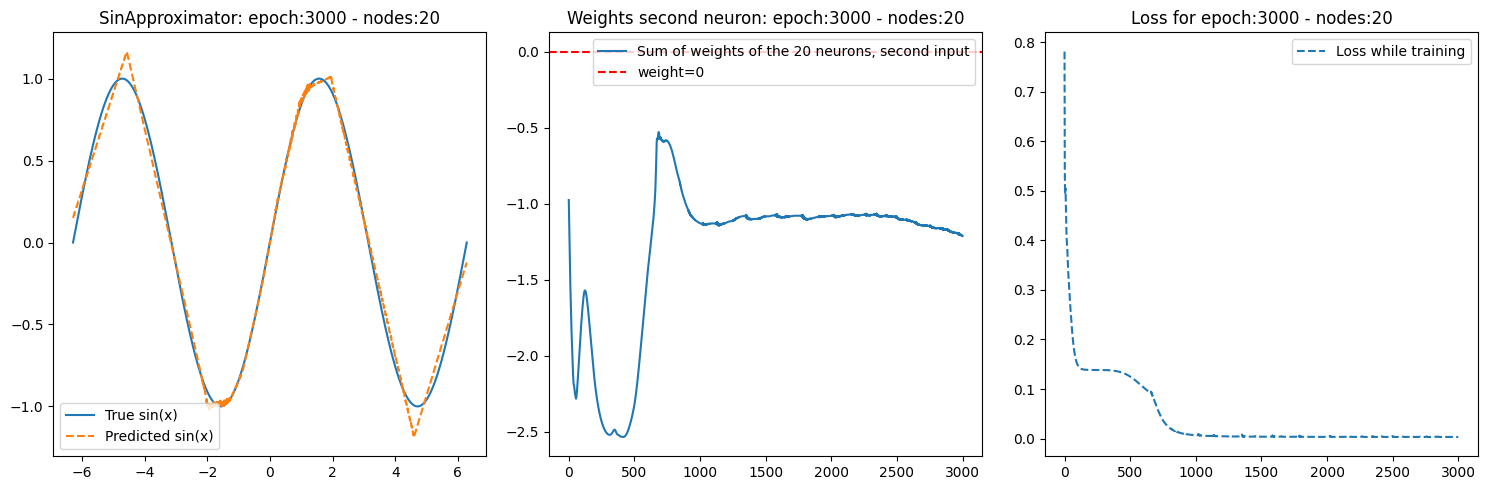

3000 30
[0.5698950290679932, 0.4586351811885834, 0.41477063298225403, 0.4104822874069214, 0.4206787347793579, 0.4259360730648041, 0.41946840286254883, 0.4041048586368561, 0.385219544172287, 0.36760595440864563, 0.35441169142723083, 0.3465057909488678, 0.34251174330711365, 0.3397059738636017, 0.3355267643928528, 0.32866621017456055, 0.3193337619304657, 0.3087337911128998, 0.29819923639297485, 0.2887221574783325, 0.28086182475090027, 0.27457520365715027, 0.2690880000591278, 0.26326635479927063, 0.2563246488571167, 0.2483016848564148, 0.2399231493473053, 0.23198767006397247, 0.2250826060771942, 0.21932779252529144, 0.2142057865858078, 0.20882020890712738, 0.2025926262140274, 0.19591717422008514, 0.18974155187606812, 0.18460802733898163, 0.18037769198417664, 0.17652462422847748, 0.17244090139865875, 0.16801787912845612, 0.16387026011943817, 0.16053497791290283, 0.15796466171741486, 0.15574553608894348, 0.15334495902061462, 0.15082815289497375, 0.14875395596027374, 0.14731992781162262, 0.14

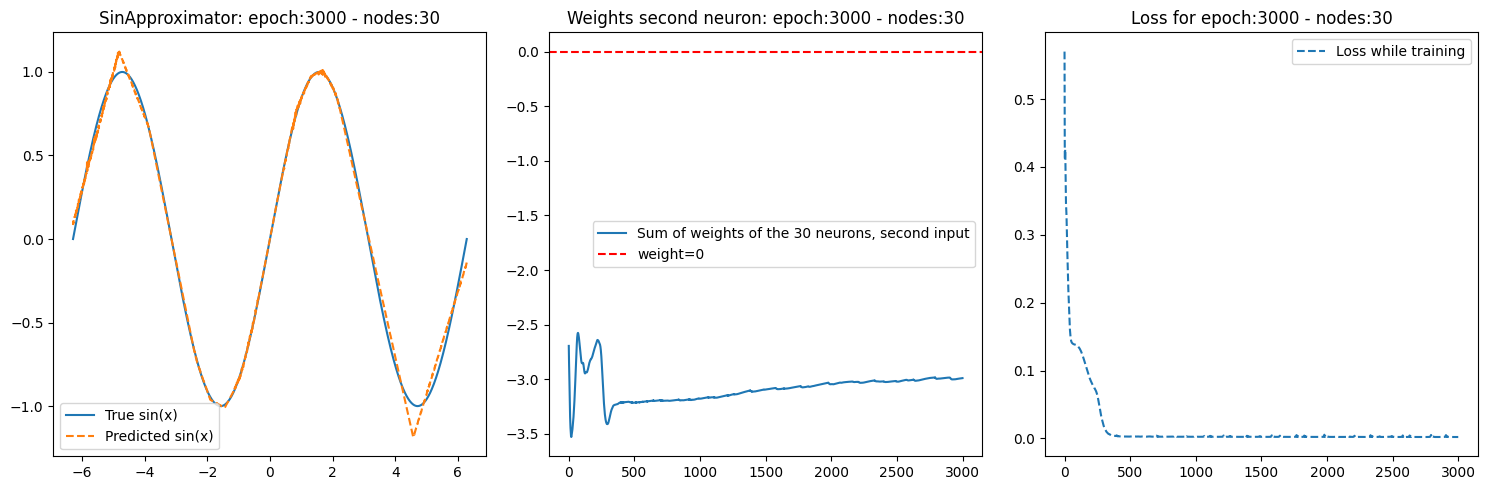

3000 40
[0.6161451935768127, 0.4491196274757385, 0.40807321667671204, 0.41956964135169983, 0.4366206228733063, 0.43720632791519165, 0.4202806353569031, 0.3936831057071686, 0.368051141500473, 0.3523053526878357, 0.34888720512390137, 0.35254502296447754, 0.35491958260536194, 0.35105377435684204, 0.3413914144039154, 0.32903623580932617, 0.3166564404964447, 0.30579090118408203, 0.2976081669330597, 0.29279813170433044, 0.2903759181499481, 0.28761711716651917, 0.282063364982605, 0.27355119585990906, 0.26396071910858154, 0.25519755482673645, 0.2478829026222229, 0.24191296100616455, 0.23712493479251862, 0.2328442633152008, 0.22766585648059845, 0.22085922956466675, 0.21339504420757294, 0.2067592591047287, 0.2013551890850067, 0.19677899777889252, 0.19272838532924652, 0.1885673552751541, 0.1835283786058426, 0.17803481221199036, 0.17322276532649994, 0.1693042516708374, 0.16597476601600647, 0.16303162276744843, 0.15980736911296844, 0.15614427626132965, 0.15283125638961792, 0.15012331306934357, 0.14

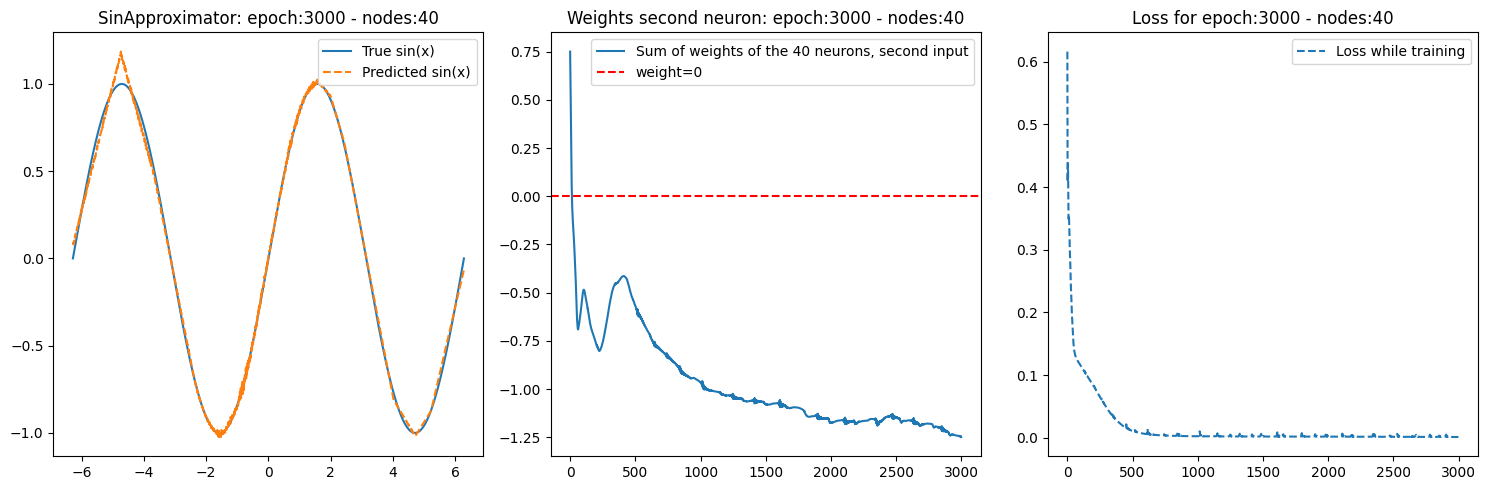

3000 50
[0.568361222743988, 0.4750463366508484, 0.5096543431282043, 0.48810067772865295, 0.4461340606212616, 0.4250786304473877, 0.4232030510902405, 0.4180973768234253, 0.40131035447120667, 0.3809565603733063, 0.3664799928665161, 0.35847583413124084, 0.35095393657684326, 0.3398466408252716, 0.32661691308021545, 0.3150983452796936, 0.30661889910697937, 0.2987178862094879, 0.2889021337032318, 0.27790001034736633, 0.2682335078716278, 0.26071402430534363, 0.2535647451877594, 0.2451390027999878, 0.23618711531162262, 0.22860518097877502, 0.22269780933856964, 0.21670517325401306, 0.2095576524734497, 0.20254556834697723, 0.19714675843715668, 0.19256986677646637, 0.18736281991004944, 0.1818457692861557, 0.1772756427526474, 0.17370423674583435, 0.17006832361221313, 0.16613240540027618, 0.1626168191432953, 0.15984703600406647, 0.1573910117149353, 0.15479689836502075, 0.15238307416439056, 0.15068663656711578, 0.14918875694274902, 0.14725804328918457, 0.1456719934940338, 0.144758939743042, 0.143485

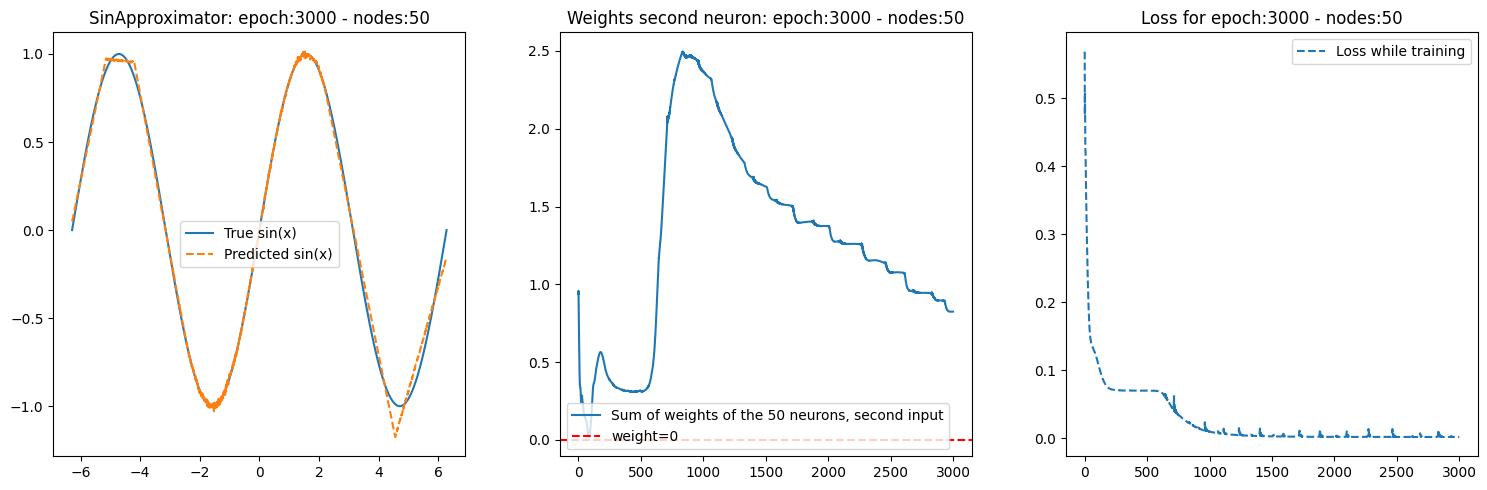

3000 60
[0.789057195186615, 0.4676520526409149, 0.4857831299304962, 0.5490111112594604, 0.5344812273979187, 0.47644472122192383, 0.4257707893848419, 0.3981568515300751, 0.3896092176437378, 0.3918730616569519, 0.39414408802986145, 0.3869359493255615, 0.3668404519557953, 0.3388199210166931, 0.3139628767967224, 0.301611989736557, 0.30177822709083557, 0.3049091100692749, 0.30051374435424805, 0.286185085773468, 0.26812633872032166, 0.2542760372161865, 0.24767084419727325, 0.24544502794742584, 0.24303904175758362, 0.23814992606639862, 0.2309512197971344, 0.22241723537445068, 0.21385306119918823, 0.20726390182971954, 0.20406746864318848, 0.20296300947666168, 0.20050543546676636, 0.19483374059200287, 0.18790459632873535, 0.18292467296123505, 0.1805434674024582, 0.1788814216852188, 0.17642958462238312, 0.1731828898191452, 0.1695064902305603, 0.16580720245838165, 0.1630452573299408, 0.16168539226055145, 0.16048695147037506, 0.15808147192001343, 0.15509197115898132, 0.15293416380882263, 0.1516944

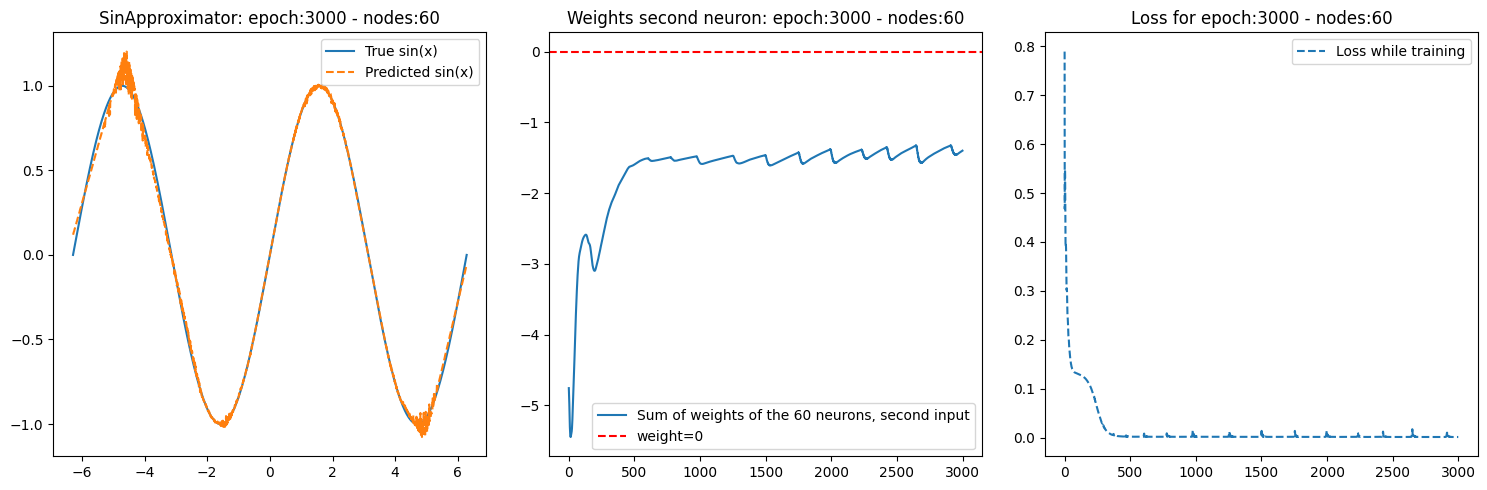

3000 70
[0.5237321853637695, 0.46247485280036926, 0.44305747747421265, 0.4369765520095825, 0.41623058915138245, 0.36944448947906494, 0.3466366231441498, 0.35959532856941223, 0.3670617640018463, 0.3431249260902405, 0.30882859230041504, 0.2928107976913452, 0.2958436608314514, 0.2971838712692261, 0.28583747148513794, 0.26959025859832764, 0.2583116590976715, 0.25135165452957153, 0.24423900246620178, 0.23759888112545013, 0.23334118723869324, 0.22850465774536133, 0.21907101571559906, 0.20837998390197754, 0.2031555324792862, 0.20272228121757507, 0.19966141879558563, 0.1914869099855423, 0.183729887008667, 0.18047724664211273, 0.17871162295341492, 0.17493288218975067, 0.17028836905956268, 0.1664913445711136, 0.1629481464624405, 0.159727543592453, 0.15772424638271332, 0.15555118024349213, 0.15170598030090332, 0.14827454090118408, 0.14705617725849152, 0.14566579461097717, 0.14244753122329712, 0.13967810571193695, 0.1384577602148056, 0.13696816563606262, 0.13482367992401123, 0.13307996094226837, 0

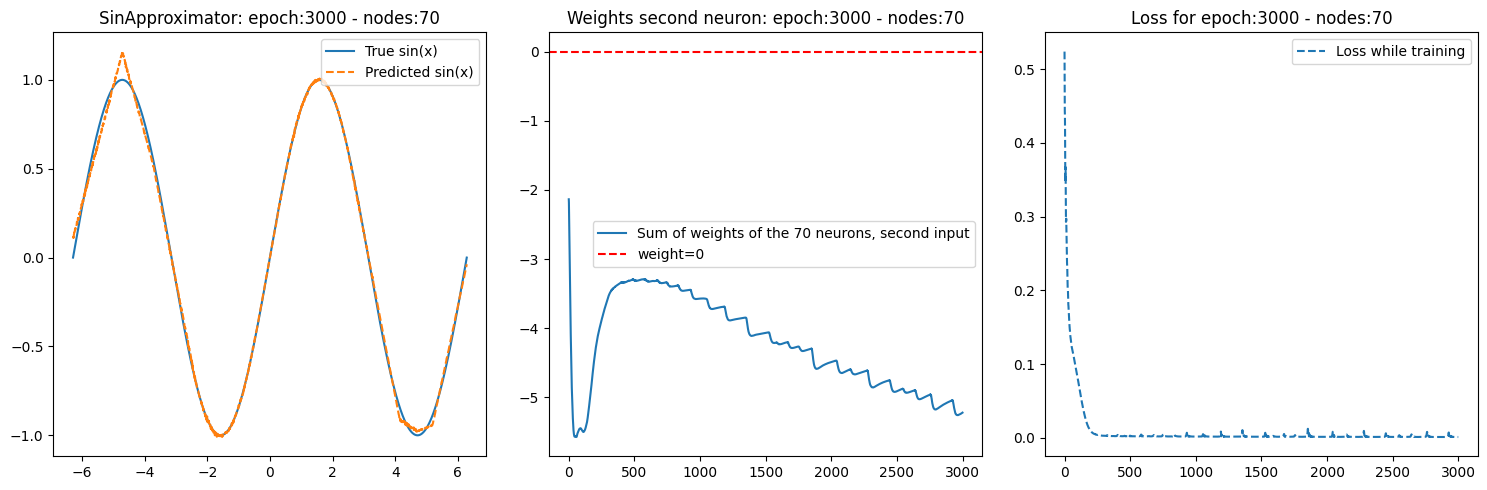

3000 80
[1.5085023641586304, 0.8555953502655029, 0.47355419397354126, 0.4500499963760376, 0.5764043927192688, 0.6569200158119202, 0.6617417931556702, 0.6109141707420349, 0.518166720867157, 0.42084866762161255, 0.3605932891368866, 0.3470200002193451, 0.35831165313720703, 0.37385839223861694, 0.3875274062156677, 0.3949304223060608, 0.3864113390445709, 0.3588311970233917, 0.3240568935871124, 0.2962741553783417, 0.2783238887786865, 0.2667664587497711, 0.26237666606903076, 0.26624786853790283, 0.2716197669506073, 0.2699374854564667, 0.2616398334503174, 0.2511916160583496, 0.23856881260871887, 0.22415423393249512, 0.21332943439483643, 0.20871005952358246, 0.20661213994026184, 0.20506970584392548, 0.2047448605298996, 0.20282220840454102, 0.19700613617897034, 0.19004815816879272, 0.18364547193050385, 0.1771644502878189, 0.1726732701063156, 0.17101985216140747, 0.1696418970823288, 0.16823901236057281, 0.16673199832439423, 0.16335994005203247, 0.15930365025997162, 0.15569676458835602, 0.15210147

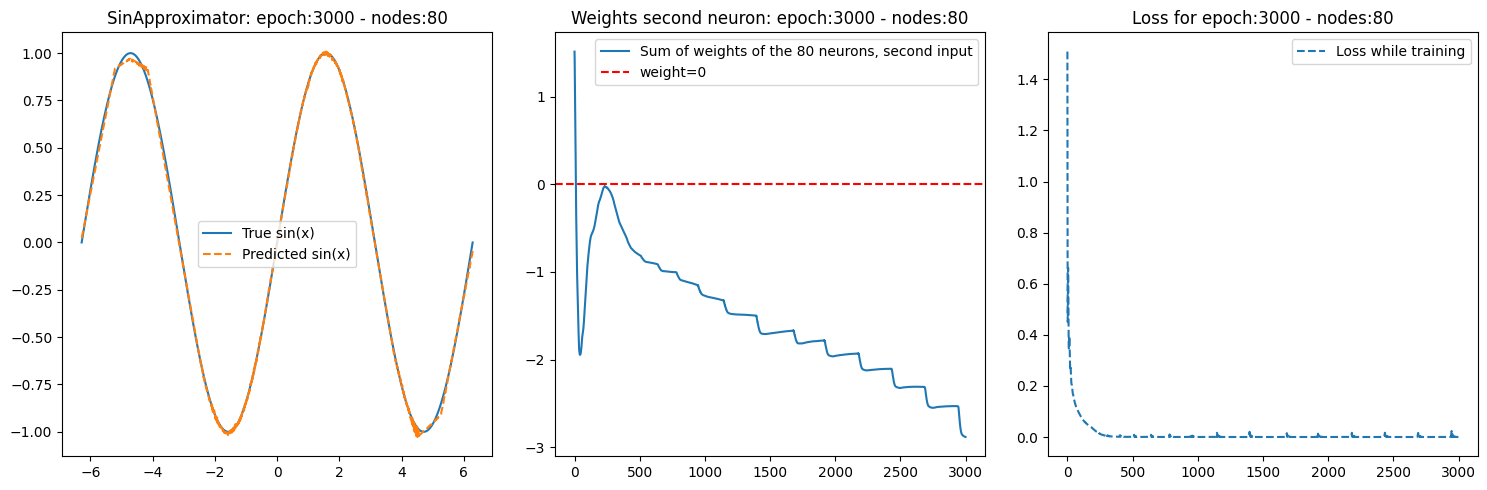

3000 90
[0.6235175132751465, 0.4598919749259949, 0.5562487244606018, 0.45553746819496155, 0.37810930609703064, 0.3973222076892853, 0.4210985004901886, 0.3896169364452362, 0.33935025334358215, 0.3172680139541626, 0.3240358531475067, 0.3273932933807373, 0.3090246915817261, 0.2814527750015259, 0.2654458284378052, 0.2644563317298889, 0.2645549476146698, 0.2545846700668335, 0.2383999079465866, 0.2266933023929596, 0.22283144295215607, 0.22071319818496704, 0.2142915576696396, 0.20484627783298492, 0.19769714772701263, 0.19426459074020386, 0.19127780199050903, 0.18650247156620026, 0.18127156794071198, 0.17730897665023804, 0.1741698831319809, 0.17103546857833862, 0.1682499647140503, 0.16600272059440613, 0.16337786614894867, 0.16036608815193176, 0.15847325325012207, 0.1576620638370514, 0.15592794120311737, 0.1531289666891098, 0.15155181288719177, 0.15145151317119598, 0.1503279209136963, 0.14787819981575012, 0.1466245949268341, 0.14671048521995544, 0.14572440087795258, 0.14378736913204193, 0.14305

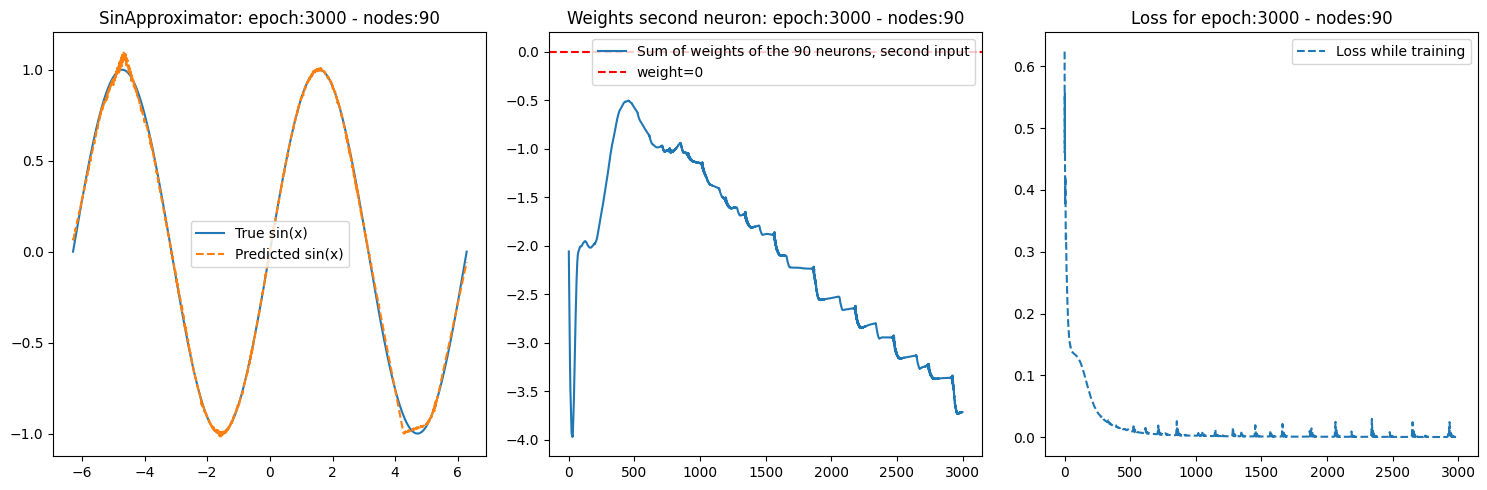

4000 10
[0.959219217300415, 0.8154375553131104, 0.7059764266014099, 0.6269723773002625, 0.5737394690513611, 0.5417613387107849, 0.5258589386940002, 0.5204395055770874, 0.5200940370559692, 0.5201129913330078, 0.5173966288566589, 0.5109177827835083, 0.5012788772583008, 0.48988640308380127, 0.4783027470111847, 0.46781155467033386, 0.45923909544944763, 0.4529111087322235, 0.44870227575302124, 0.4461404085159302, 0.4445551633834839, 0.4432010352611542, 0.4413929879665375, 0.4386295974254608, 0.43467065691947937, 0.429560124874115, 0.42356225848197937, 0.41711604595184326, 0.41071760654449463, 0.4048496186733246, 0.39984771609306335, 0.395821750164032, 0.392682284116745, 0.3901611268520355, 0.38789644837379456, 0.385480672121048, 0.3826335370540619, 0.3792658746242523, 0.3754482865333557, 0.3714117109775543, 0.3674098551273346, 0.3636856973171234, 0.360377699136734, 0.35746288299560547, 0.3548275828361511, 0.35229262709617615, 0.34968292713165283, 0.34693384170532227, 0.34403759241104126, 0.

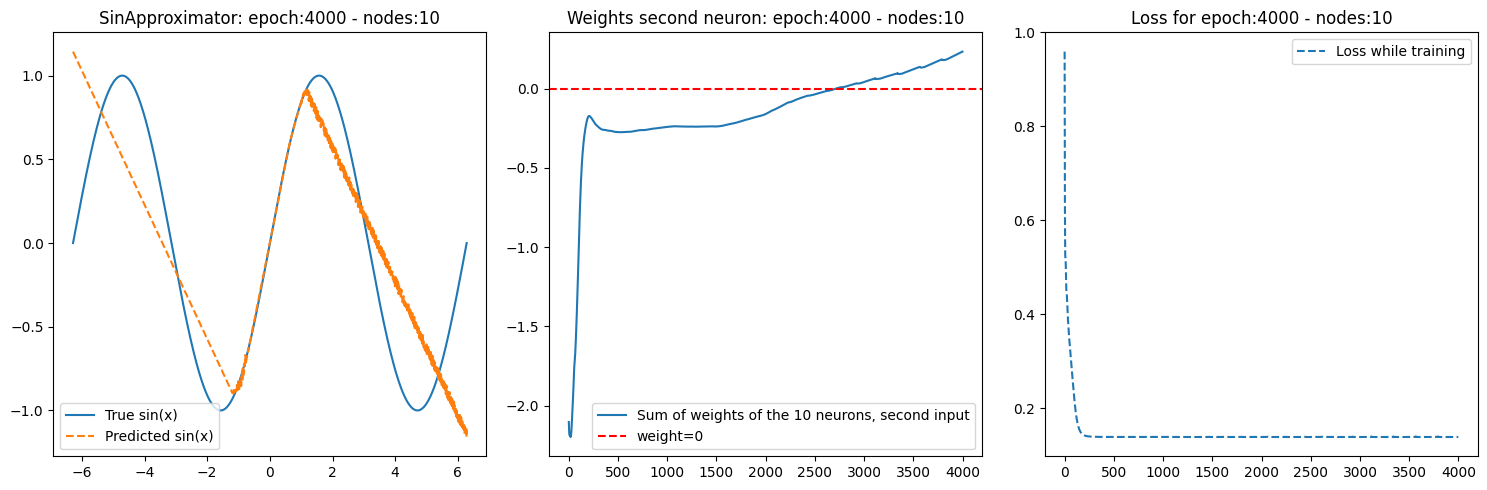

4000 20
[0.5753609538078308, 0.47590091824531555, 0.453337162733078, 0.45604243874549866, 0.4471583664417267, 0.42887598276138306, 0.4126358926296234, 0.40455615520477295, 0.4034309685230255, 0.4032714366912842, 0.3988454043865204, 0.3893859386444092, 0.37794193625450134, 0.3684018850326538, 0.3627873361110687, 0.36037787795066833, 0.35882568359375, 0.355976402759552, 0.351051926612854, 0.3449106216430664, 0.33912891149520874, 0.3347429931163788, 0.33158978819847107, 0.32860398292541504, 0.32475829124450684, 0.31983089447021484, 0.3144777715206146, 0.3095998466014862, 0.3055863082408905, 0.302058607339859, 0.2982389032840729, 0.29364049434661865, 0.2884557843208313, 0.2833101153373718, 0.27869242429733276, 0.27452778816223145, 0.2703413963317871, 0.2657572329044342, 0.26083335280418396, 0.25595441460609436, 0.2513894736766815, 0.2470407634973526, 0.24260035157203674, 0.2379286289215088, 0.233207568526268, 0.22870635986328125, 0.22445254027843475, 0.22023926675319672, 0.2159240841865539

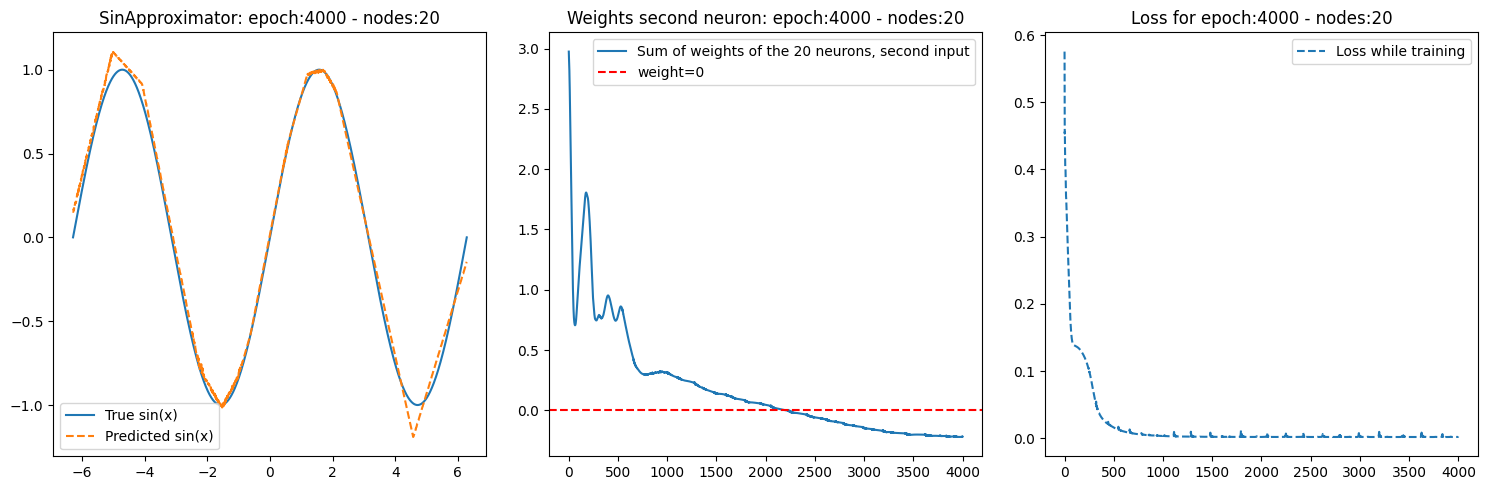

4000 30
[0.7407609820365906, 0.5819183588027954, 0.5188583731651306, 0.5351576209068298, 0.5559220314025879, 0.549129068851471, 0.5220319032669067, 0.4878650903701782, 0.45705902576446533, 0.4373866617679596, 0.42973604798316956, 0.42773574590682983, 0.4231986701488495, 0.4124293625354767, 0.3969067335128784, 0.37997663021087646, 0.3642839789390564, 0.35183030366897583, 0.34372997283935547, 0.33883368968963623, 0.3338072896003723, 0.32607051730155945, 0.31573814153671265, 0.3044794201850891, 0.29363512992858887, 0.28428882360458374, 0.277254194021225, 0.2718648314476013, 0.2662065029144287, 0.2594897449016571, 0.2520652711391449, 0.24412114918231964, 0.23653879761695862, 0.23038049042224884, 0.22524185478687286, 0.22051845490932465, 0.21579983830451965, 0.2103394716978073, 0.2045889049768448, 0.19915656745433807, 0.19426292181015015, 0.19023703038692474, 0.18648162484169006, 0.1826619803905487, 0.1786195933818817, 0.17446157336235046, 0.170716792345047, 0.167418971657753, 0.16462765634

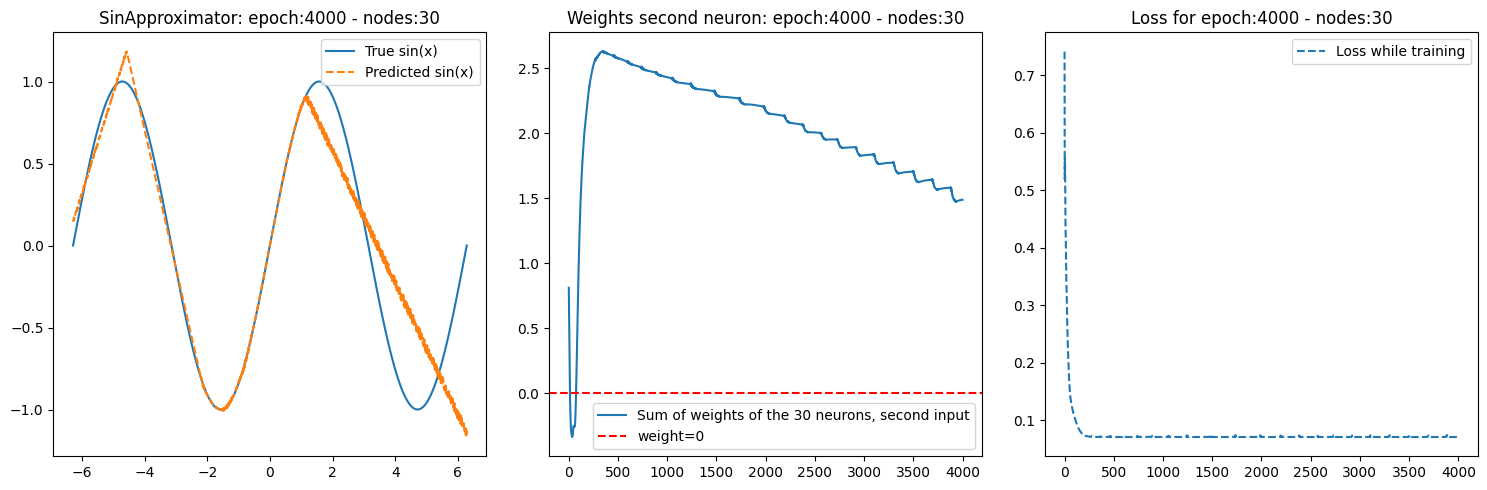

4000 40
[0.6960691213607788, 0.46981698274612427, 0.45655280351638794, 0.5000362396240234, 0.5041428208351135, 0.4719177782535553, 0.4349585473537445, 0.41315957903862, 0.40635624527931213, 0.40457063913345337, 0.4003056287765503, 0.39170312881469727, 0.38071906566619873, 0.37017571926116943, 0.3610531687736511, 0.35231608152389526, 0.3429996073246002, 0.33362656831741333, 0.32553330063819885, 0.3194810748100281, 0.3148786127567291, 0.3100459575653076, 0.3034435510635376, 0.29495853185653687, 0.28608837723731995, 0.27878838777542114, 0.27395200729370117, 0.27071958780288696, 0.2671859860420227, 0.26189374923706055, 0.2548842132091522, 0.24761860072612762, 0.24174992740154266, 0.23780742287635803, 0.23482203483581543, 0.23121845722198486, 0.22621512413024902, 0.22044329345226288, 0.21525710821151733, 0.2114516794681549, 0.2085990011692047, 0.20558226108551025, 0.20172299444675446, 0.19738341867923737, 0.19347511231899261, 0.1905047595500946, 0.18809808790683746, 0.18548953533172607, 0.1

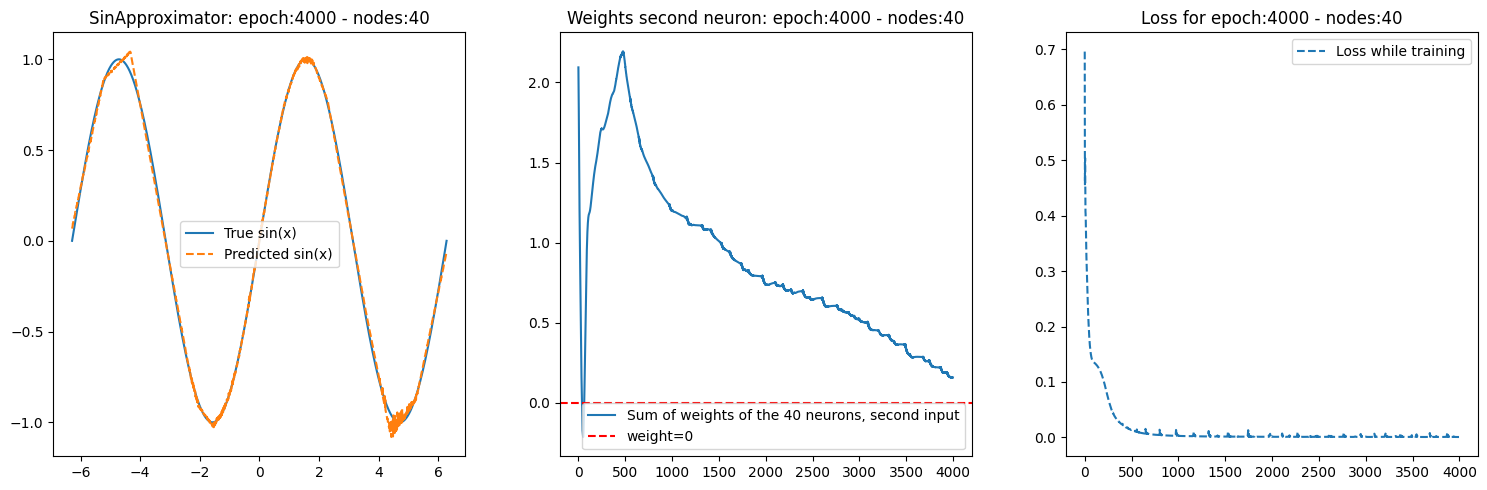

4000 50
[0.46369197964668274, 0.4345419406890869, 0.41554731130599976, 0.40336230397224426, 0.38405364751815796, 0.3562855124473572, 0.34054577350616455, 0.338113933801651, 0.33326080441474915, 0.31636133790016174, 0.2951265871524811, 0.2818748652935028, 0.2785837948322296, 0.27551549673080444, 0.2646220326423645, 0.24929171800613403, 0.23805148899555206, 0.23360520601272583, 0.23045314848423004, 0.22316902875900269, 0.21311138570308685, 0.2051679790019989, 0.20078498125076294, 0.19703678786754608, 0.19170059263706207, 0.18587149679660797, 0.1812300682067871, 0.1775272935628891, 0.17405115067958832, 0.17092359066009521, 0.16794943809509277, 0.16455435752868652, 0.16153427958488464, 0.16000409424304962, 0.15870030224323273, 0.15604616701602936, 0.1535983830690384, 0.15287429094314575, 0.15200397372245789, 0.1498357653617859, 0.14829182624816895, 0.1478075236082077, 0.1467449814081192, 0.1453486829996109, 0.14450505375862122, 0.14375121891498566, 0.14302140474319458, 0.14231553673744202,

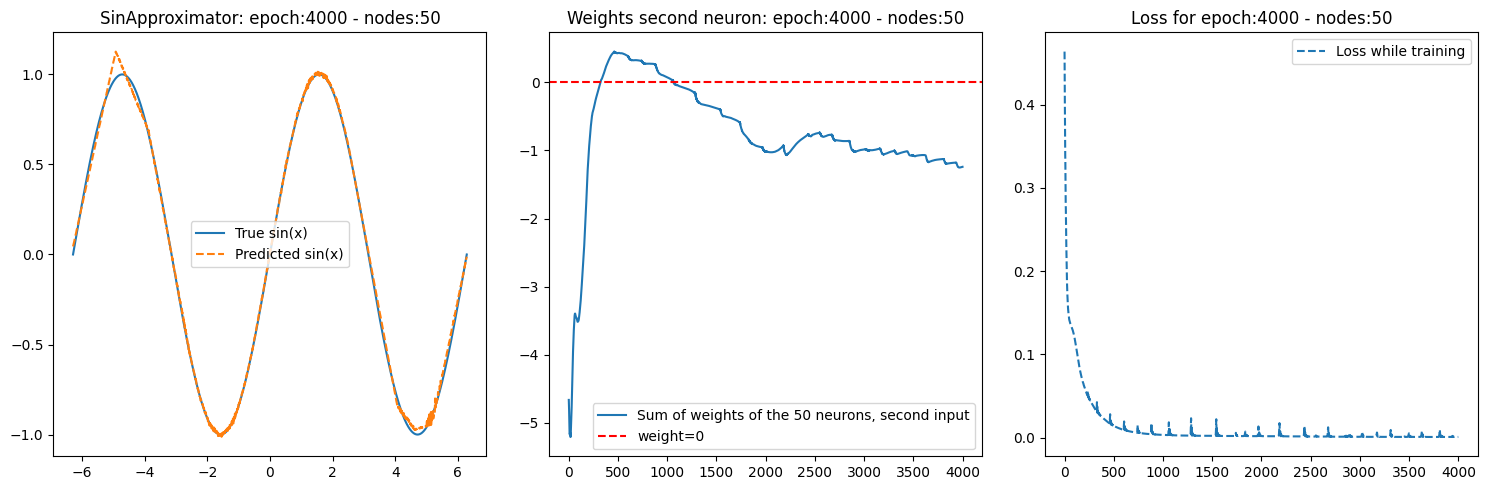

4000 60
[0.5243693590164185, 0.4704059660434723, 0.4792216122150421, 0.4313289523124695, 0.40384599566459656, 0.39580684900283813, 0.3902638554573059, 0.37670767307281494, 0.3559800982475281, 0.33421167731285095, 0.3212703466415405, 0.31764209270477295, 0.3112631142139435, 0.2946285605430603, 0.2751333713531494, 0.26414310932159424, 0.26117947697639465, 0.25555023550987244, 0.24254287779331207, 0.22867822647094727, 0.22056631743907928, 0.2162228375673294, 0.21033181250095367, 0.20221154391765594, 0.19431644678115845, 0.18771184980869293, 0.18280160427093506, 0.1794300377368927, 0.1752653568983078, 0.16920895874500275, 0.16454698145389557, 0.16310524940490723, 0.16127154231071472, 0.1572796106338501, 0.15418373048305511, 0.15292127430438995, 0.15158693492412567, 0.14986824989318848, 0.14801950752735138, 0.146311953663826, 0.14571607112884521, 0.14499960839748383, 0.14310599863529205, 0.14195182919502258, 0.1416229009628296, 0.1406310796737671, 0.13957852125167847, 0.13884709775447845, 0

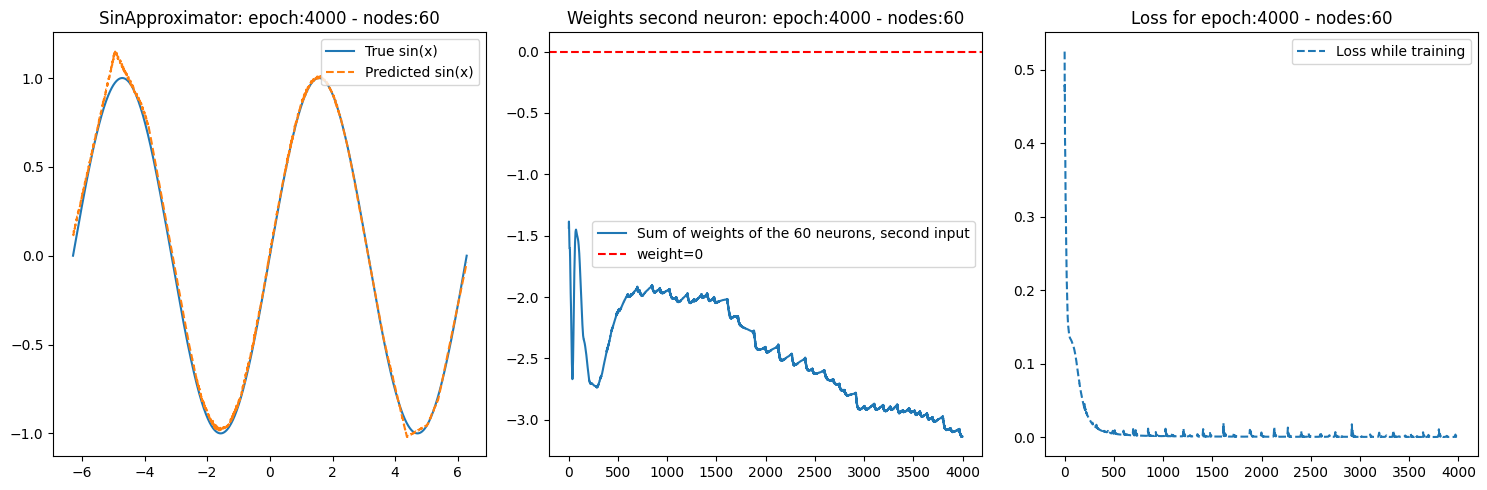

4000 70
[1.0947902202606201, 0.6160892844200134, 0.43640440702438354, 0.47713467478752136, 0.5851165652275085, 0.6068733930587769, 0.5362515449523926, 0.4415152966976166, 0.3762432336807251, 0.3525969386100769, 0.3566994071006775, 0.37272754311561584, 0.3876648247241974, 0.3893949091434479, 0.3706541657447815, 0.3366195261478424, 0.3033595085144043, 0.28508806228637695, 0.2833414375782013, 0.28881892561912537, 0.292538583278656, 0.2912786602973938, 0.28430989384651184, 0.2709328234195709, 0.2537030875682831, 0.23954878747463226, 0.2337002158164978, 0.2341100126504898, 0.234737828373909, 0.23250465095043182, 0.22756387293338776, 0.2198646515607834, 0.21004924178123474, 0.20167596638202667, 0.19781802594661713, 0.1969720870256424, 0.1956930011510849, 0.19296133518218994, 0.188982754945755, 0.18347540497779846, 0.17771032452583313, 0.17414923012256622, 0.17275960743427277, 0.171522855758667, 0.16974526643753052, 0.16729703545570374, 0.1637204885482788, 0.16012509167194366, 0.1579705923795

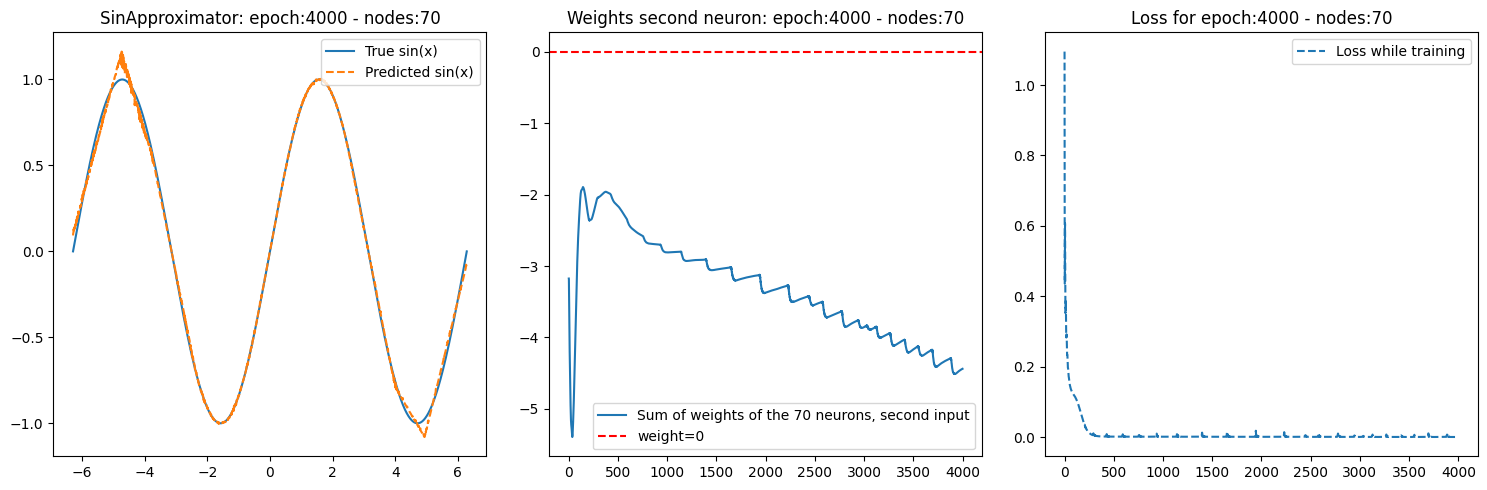

4000 80
[1.369316577911377, 0.6538712978363037, 0.3852064311504364, 0.5418775677680969, 0.6862380504608154, 0.6837602853775024, 0.593249499797821, 0.4700785279273987, 0.3693024516105652, 0.33845922350883484, 0.3724586069583893, 0.4198629856109619, 0.4395393431186676, 0.426823228597641, 0.39307379722595215, 0.34788501262664795, 0.3049275577068329, 0.2822389602661133, 0.28557634353637695, 0.3007703423500061, 0.30981016159057617, 0.30705106258392334, 0.2946781516075134, 0.2744060456752777, 0.25110840797424316, 0.23509685695171356, 0.23172742128372192, 0.2351231873035431, 0.23736602067947388, 0.23611782491207123, 0.23020902276039124, 0.21847200393676758, 0.2053016871213913, 0.19726137816905975, 0.19464702904224396, 0.19422218203544617, 0.19473779201507568, 0.19368872046470642, 0.18824191391468048, 0.18093793094158173, 0.17537188529968262, 0.17167815566062927, 0.17037785053253174, 0.1709105521440506, 0.16997045278549194, 0.16713382303714752, 0.1637049913406372, 0.15994152426719666, 0.157693

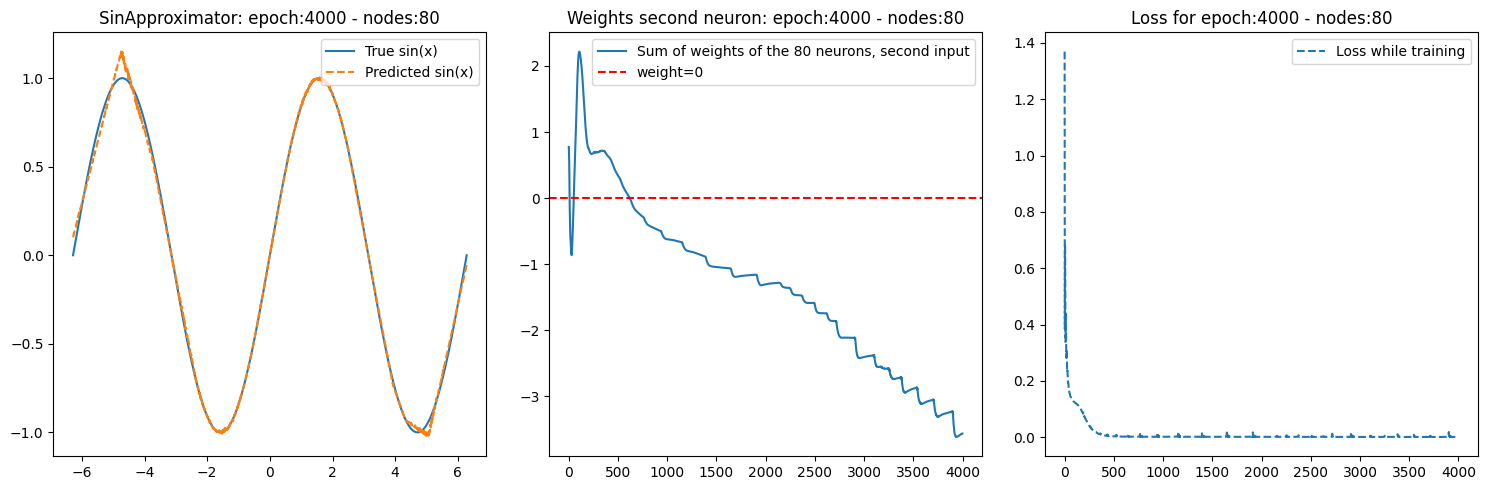

4000 90
[0.7948924899101257, 0.59576416015625, 0.624224066734314, 0.5950362682342529, 0.5447795391082764, 0.47258085012435913, 0.42968806624412537, 0.438964307308197, 0.4554370641708374, 0.43049415946006775, 0.37474051117897034, 0.33443430066108704, 0.33263880014419556, 0.34708109498023987, 0.34247344732284546, 0.31339043378829956, 0.2823517918586731, 0.2689886689186096, 0.2702999413013458, 0.2698306143283844, 0.2591821849346161, 0.24371899664402008, 0.23142382502555847, 0.22376495599746704, 0.2185559868812561, 0.21459105610847473, 0.21045935153961182, 0.20354963839054108, 0.1939799189567566, 0.18703244626522064, 0.18620119988918304, 0.18668332695960999, 0.18190719187259674, 0.17388272285461426, 0.16980159282684326, 0.17051897943019867, 0.17008142173290253, 0.16610187292099, 0.16217924654483795, 0.16050273180007935, 0.15956228971481323, 0.15830816328525543, 0.15673957765102386, 0.15436489880084991, 0.1519560068845749, 0.15120425820350647, 0.1509462296962738, 0.1489267498254776, 0.14642

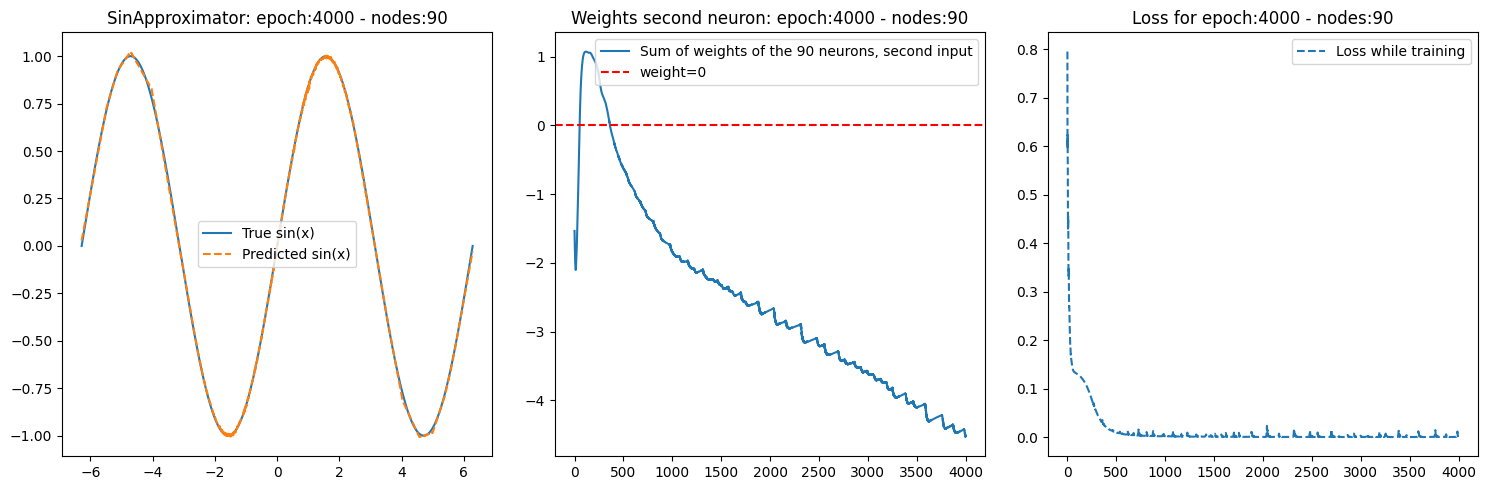

5000 10
[0.8022894859313965, 0.7265391945838928, 0.6671097874641418, 0.6166254878044128, 0.5737536549568176, 0.5382630825042725, 0.5097807049751282, 0.48723503947257996, 0.4694439172744751, 0.4556095004081726, 0.445121169090271, 0.4375446140766144, 0.43235260248184204, 0.4288826882839203, 0.42640063166618347, 0.4243411123752594, 0.4223221242427826, 0.4201008975505829, 0.41749832034111023, 0.4143335223197937, 0.4105231463909149, 0.40608346462249756, 0.4011399447917938, 0.3959530293941498, 0.3907237946987152, 0.3855992555618286, 0.38065117597579956, 0.3759639859199524, 0.3715777099132538, 0.3675065338611603, 0.36374029517173767, 0.3601897358894348, 0.35673627257347107, 0.3532573878765106, 0.3496829867362976, 0.3459564447402954, 0.3420325815677643, 0.3378904461860657, 0.3335585296154022, 0.32909393310546875, 0.3245653510093689, 0.32002705335617065, 0.31552016735076904, 0.3110820949077606, 0.3067338466644287, 0.3024739623069763, 0.29827338457107544, 0.2940978407859802, 0.28991982340812683,

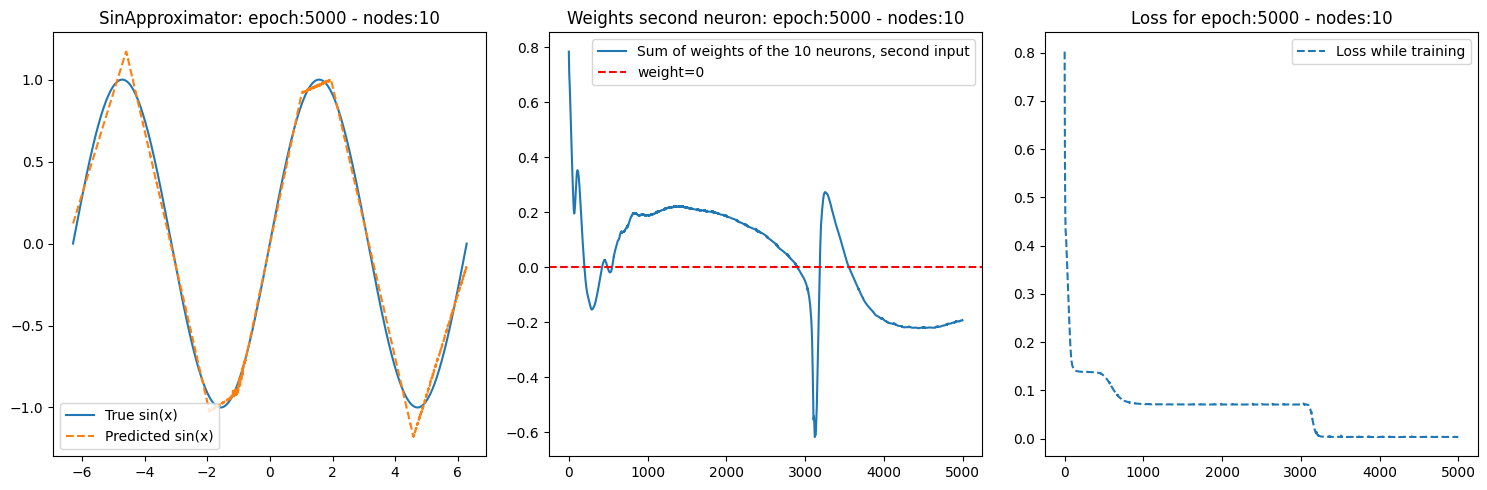

5000 20
[0.4727002680301666, 0.4049314558506012, 0.39623168110847473, 0.4073566496372223, 0.40651735663414, 0.3928035497665405, 0.3759925961494446, 0.36369529366493225, 0.35824498534202576, 0.35712867975234985, 0.35579973459243774, 0.3512386083602905, 0.3433395326137543, 0.334113210439682, 0.32592669129371643, 0.3200669288635254, 0.3161652386188507, 0.31267088651657104, 0.3080478608608246, 0.3018075227737427, 0.29462313652038574, 0.28770917654037476, 0.2819328308105469, 0.27726292610168457, 0.27288588881492615, 0.26788195967674255, 0.2619631290435791, 0.25561589002609253, 0.2496529072523117, 0.24449272453784943, 0.23985549807548523, 0.2350667119026184, 0.22971898317337036, 0.22404548525810242, 0.21865728497505188, 0.21390673518180847, 0.20956121385097504, 0.20511329174041748, 0.20036746561527252, 0.19565515220165253, 0.19141004979610443, 0.18765400350093842, 0.18401311337947845, 0.180240660905838, 0.1765417903661728, 0.1732558310031891, 0.17037416994571686, 0.167585089802742, 0.1647668

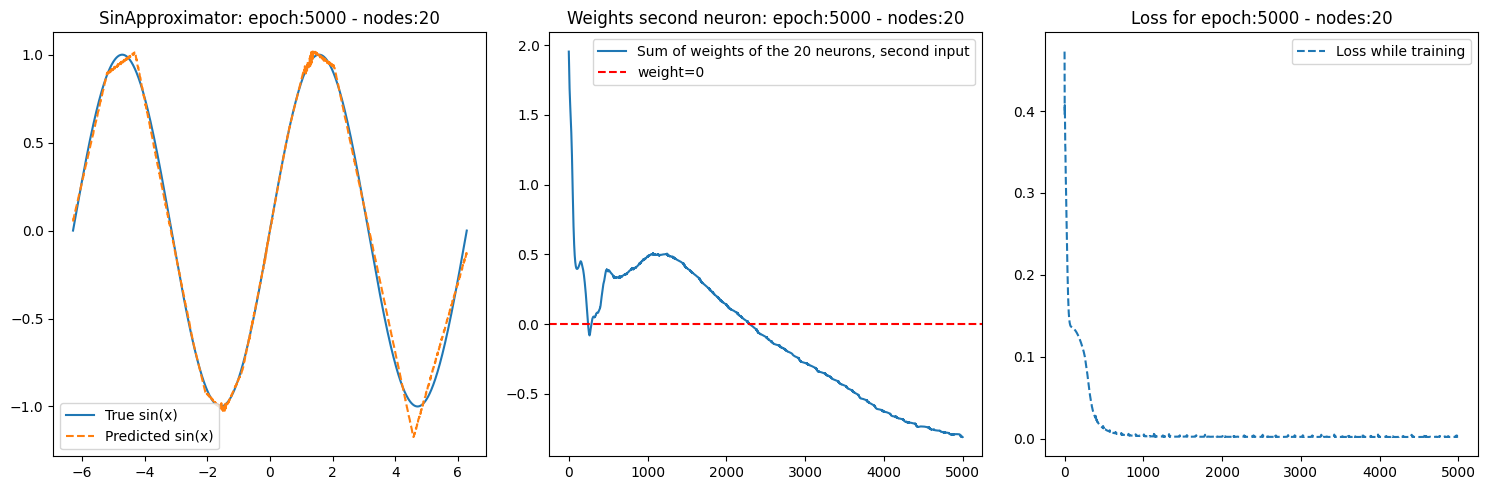

5000 30
[0.8732465505599976, 0.5673554539680481, 0.43410614132881165, 0.4381638467311859, 0.49659332633018494, 0.5315706729888916, 0.5222297310829163, 0.4838913381099701, 0.43916910886764526, 0.40508124232292175, 0.3890054523944855, 0.38889291882514954, 0.3966138958930969, 0.40302774310112, 0.4022904634475708, 0.39339479804039, 0.3792041838169098, 0.36416611075401306, 0.35211169719696045, 0.3448363244533539, 0.34177109599113464, 0.3407461941242218, 0.33928337693214417, 0.335708886384964, 0.32968422770500183, 0.3220461905002594, 0.3142053782939911, 0.3074623942375183, 0.30242684483528137, 0.298837274312973, 0.29581183195114136, 0.2923787832260132, 0.28796517848968506, 0.2825818955898285, 0.2767517566680908, 0.2711600363254547, 0.26628199219703674, 0.26217296719551086, 0.25848135352134705, 0.2547034025192261, 0.25047022104263306, 0.24575020372867584, 0.24085474014282227, 0.2362518310546875, 0.23224814236164093, 0.22876906394958496, 0.22542980313301086, 0.2217993289232254, 0.2177261412143

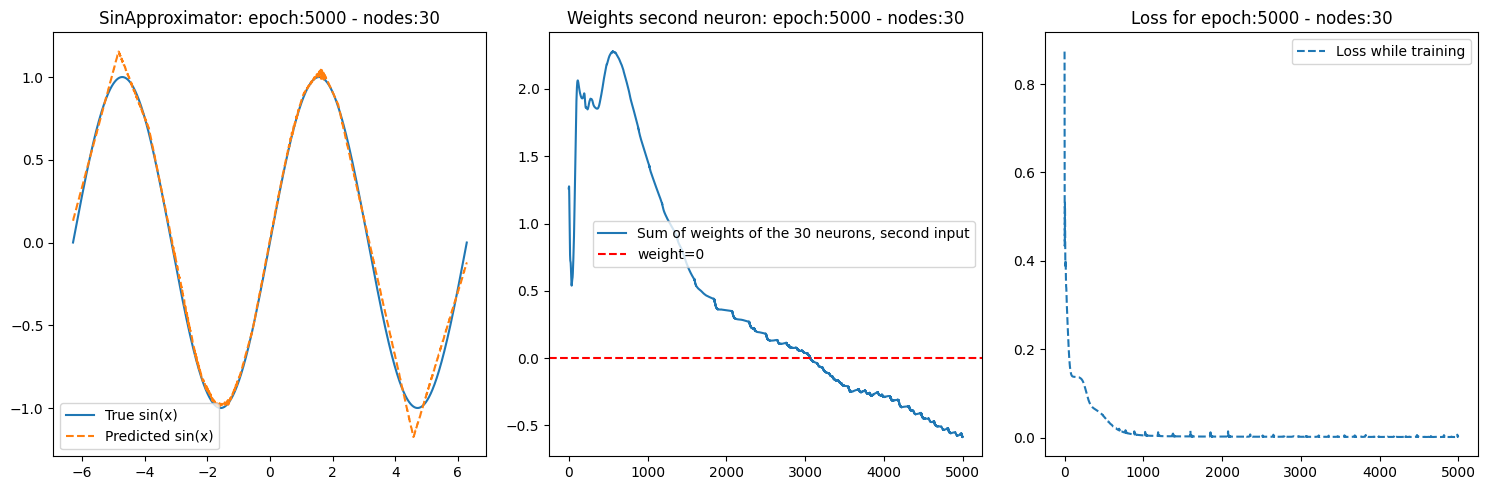

5000 40
[0.4719064235687256, 0.452023446559906, 0.44743767380714417, 0.4153847098350525, 0.39838746190071106, 0.3962501585483551, 0.38743168115615845, 0.3693535625934601, 0.3533514440059662, 0.34507471323013306, 0.3392893075942993, 0.32957723736763, 0.31688010692596436, 0.3063339293003082, 0.2999701499938965, 0.2944493591785431, 0.28619563579559326, 0.2763628363609314, 0.26845306158065796, 0.26297658681869507, 0.25706374645233154, 0.2491712123155594, 0.2411775439977646, 0.23510684072971344, 0.22994060814380646, 0.2235775589942932, 0.21658466756343842, 0.2109633982181549, 0.20638979971408844, 0.20099197328090668, 0.19515615701675415, 0.1904924362897873, 0.1864490807056427, 0.18161770701408386, 0.17683045566082, 0.17317083477973938, 0.16956683993339539, 0.16540029644966125, 0.16193245351314545, 0.15905365347862244, 0.15573258697986603, 0.15271440148353577, 0.1503855437040329, 0.1477939486503601, 0.14541013538837433, 0.1437249332666397, 0.14193575084209442, 0.140457421541214, 0.1394847035

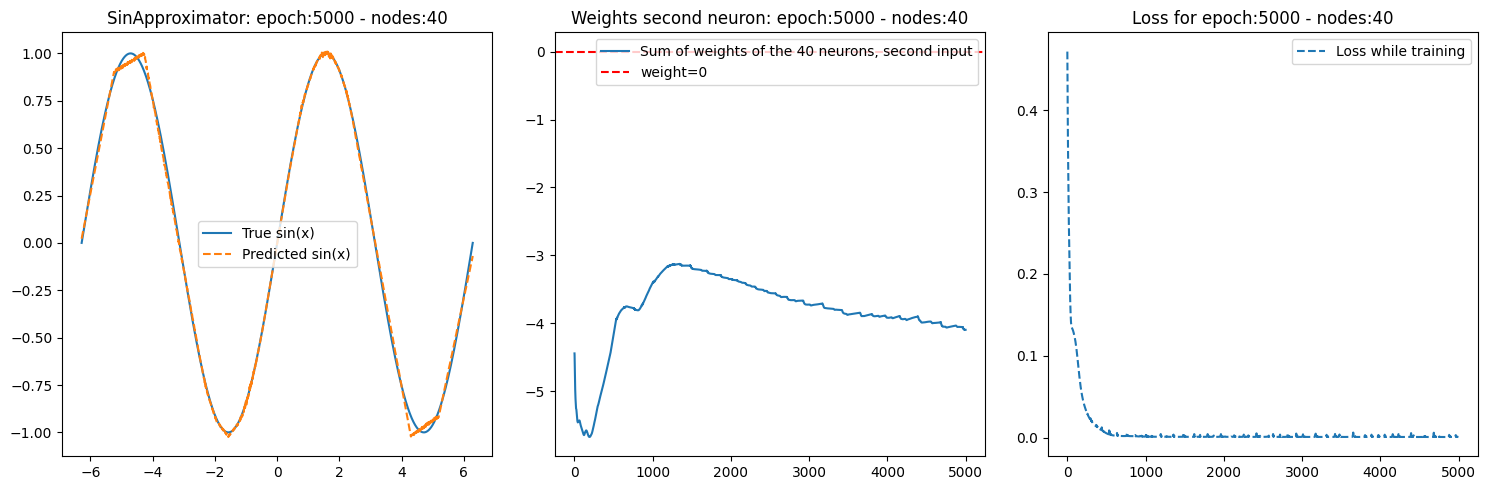

5000 50
[1.0657206773757935, 0.4940333068370819, 0.3540002405643463, 0.4762129485607147, 0.5896617770195007, 0.5796321630477905, 0.49013814330101013, 0.39393341541290283, 0.33973056077957153, 0.34011468291282654, 0.37519627809524536, 0.4103866517543793, 0.4200216233730316, 0.3997139632701874, 0.36232101917266846, 0.32650187611579895, 0.30637314915657043, 0.3056807219982147, 0.31759166717529297, 0.32981589436531067, 0.33212578296661377, 0.32166802883148193, 0.3031120300292969, 0.28474295139312744, 0.27342846989631653, 0.27115175127983093, 0.27460765838623047, 0.277802973985672, 0.27591845393180847, 0.2679862678050995, 0.25686532258987427, 0.24698995053768158, 0.241463765501976, 0.24029143154621124, 0.24078066647052765, 0.23960994184017181, 0.23514042794704437, 0.22826246917247772, 0.22140911221504211, 0.21668018400669098, 0.21444004774093628, 0.213311567902565, 0.21142226457595825, 0.20782479643821716, 0.2030579149723053, 0.1985200047492981, 0.19528278708457947, 0.1933225691318512, 0.19

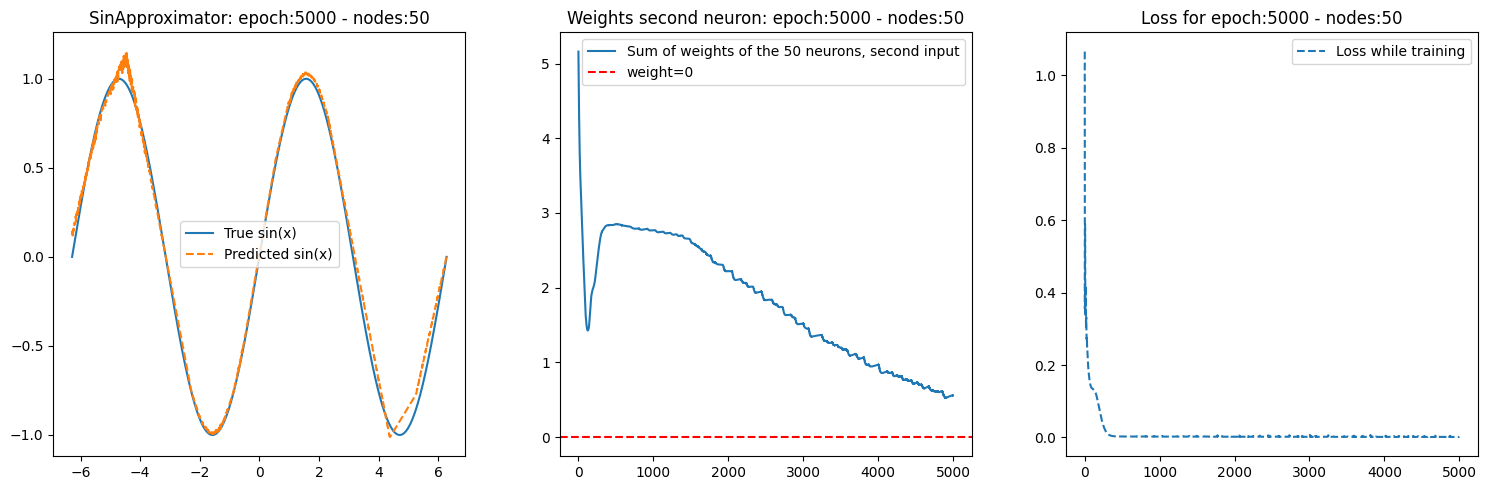

5000 60
[0.6272403001785278, 0.49791237711906433, 0.5195879340171814, 0.5113679766654968, 0.4618247449398041, 0.41639643907546997, 0.4040488004684448, 0.40850523114204407, 0.39931294322013855, 0.37325170636177063, 0.3469380736351013, 0.33189311623573303, 0.3263553977012634, 0.32248255610466003, 0.31388771533966064, 0.2992023527622223, 0.2827235460281372, 0.2711450457572937, 0.2662503123283386, 0.2623562514781952, 0.2539294958114624, 0.24216997623443604, 0.23135092854499817, 0.22363382577896118, 0.21876384317874908, 0.2143709808588028, 0.2073529064655304, 0.19836296141147614, 0.19134651124477386, 0.18730780482292175, 0.18382062017917633, 0.17924875020980835, 0.17357945442199707, 0.16835299134254456, 0.16536282002925873, 0.16312460601329803, 0.15953336656093597, 0.15554073452949524, 0.15252485871315002, 0.15081539750099182, 0.1491025686264038, 0.14623971283435822, 0.14378076791763306, 0.1424253284931183, 0.1413041055202484, 0.13956668972969055, 0.13762255012989044, 0.13666890561580658, 0

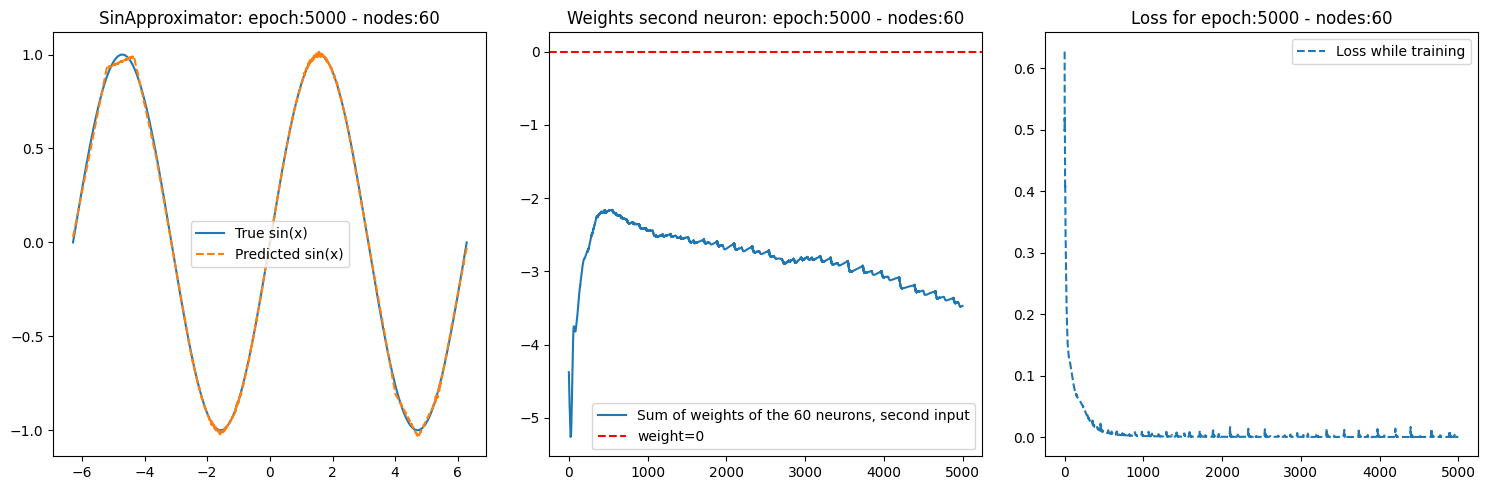

5000 70
[0.5927650332450867, 0.46675702929496765, 0.5295647978782654, 0.4665454030036926, 0.41006165742874146, 0.40676063299179077, 0.4178537428379059, 0.40406933426856995, 0.37338653206825256, 0.34822118282318115, 0.3384867012500763, 0.33747509121894836, 0.3313084840774536, 0.3145884871482849, 0.2937771677970886, 0.279640257358551, 0.2756194770336151, 0.2737482488155365, 0.26429784297943115, 0.2479642778635025, 0.2346772402524948, 0.23029747605323792, 0.22900578379631042, 0.22202357649803162, 0.21007631719112396, 0.20108024775981903, 0.1981915831565857, 0.19609959423542023, 0.19012346863746643, 0.18256500363349915, 0.17749588191509247, 0.1749013513326645, 0.17230980098247528, 0.16835521161556244, 0.163685604929924, 0.16032588481903076, 0.15906564891338348, 0.15737758576869965, 0.1536535769701004, 0.15067003667354584, 0.15004946291446686, 0.1489497423171997, 0.14628072082996368, 0.1444738209247589, 0.14392414689064026, 0.14297989010810852, 0.14146339893341064, 0.14018529653549194, 0.13

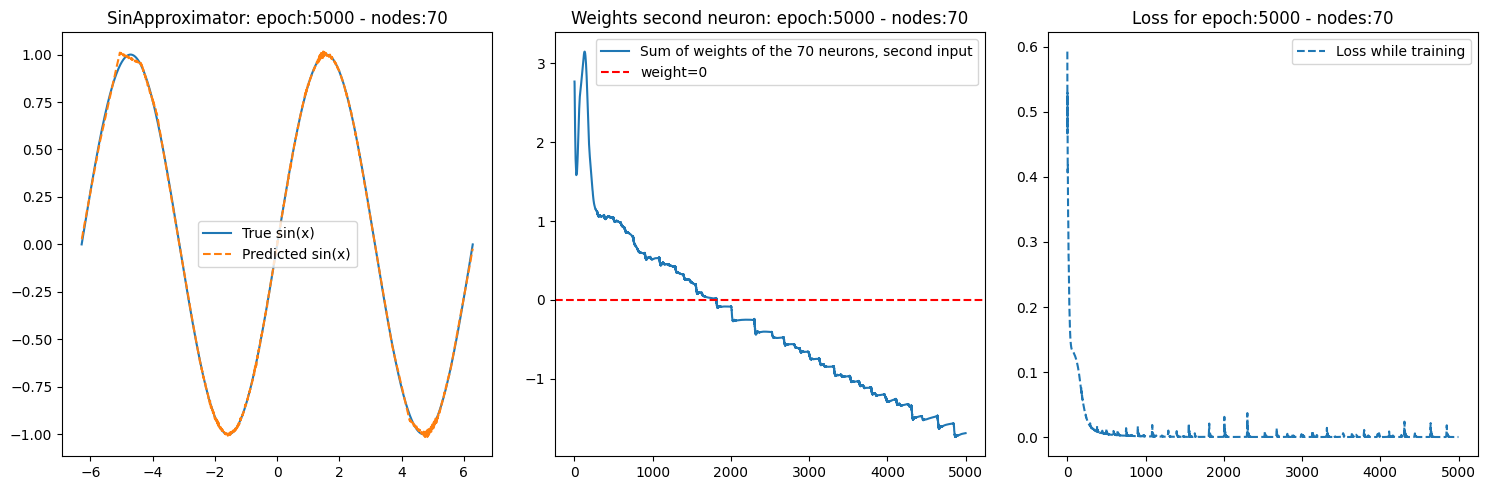

5000 80
[0.9650761485099792, 0.5469129681587219, 0.455643892288208, 0.6128253936767578, 0.6440916657447815, 0.527772068977356, 0.40907612442970276, 0.3691757321357727, 0.38920286297798157, 0.4168352782726288, 0.4236857295036316, 0.4073216915130615, 0.37417298555374146, 0.3339037299156189, 0.3034302592277527, 0.29695868492126465, 0.31079739332199097, 0.3237474262714386, 0.3171536922454834, 0.2927168905735016, 0.2669681906700134, 0.25303223729133606, 0.25079357624053955, 0.2524716556072235, 0.2521708309650421, 0.24785777926445007, 0.23867031931877136, 0.22535397112369537, 0.21293377876281738, 0.20749935507774353, 0.20872762799263, 0.20934738218784332, 0.20403985679149628, 0.19506444036960602, 0.18735770881175995, 0.18235059082508087, 0.17928320169448853, 0.17797301709651947, 0.1769198179244995, 0.17309188842773438, 0.1667686253786087, 0.1619037240743637, 0.16001462936401367, 0.15877492725849152, 0.15692435204982758, 0.1545592099428177, 0.15104995667934418, 0.14719830453395844, 0.14514110

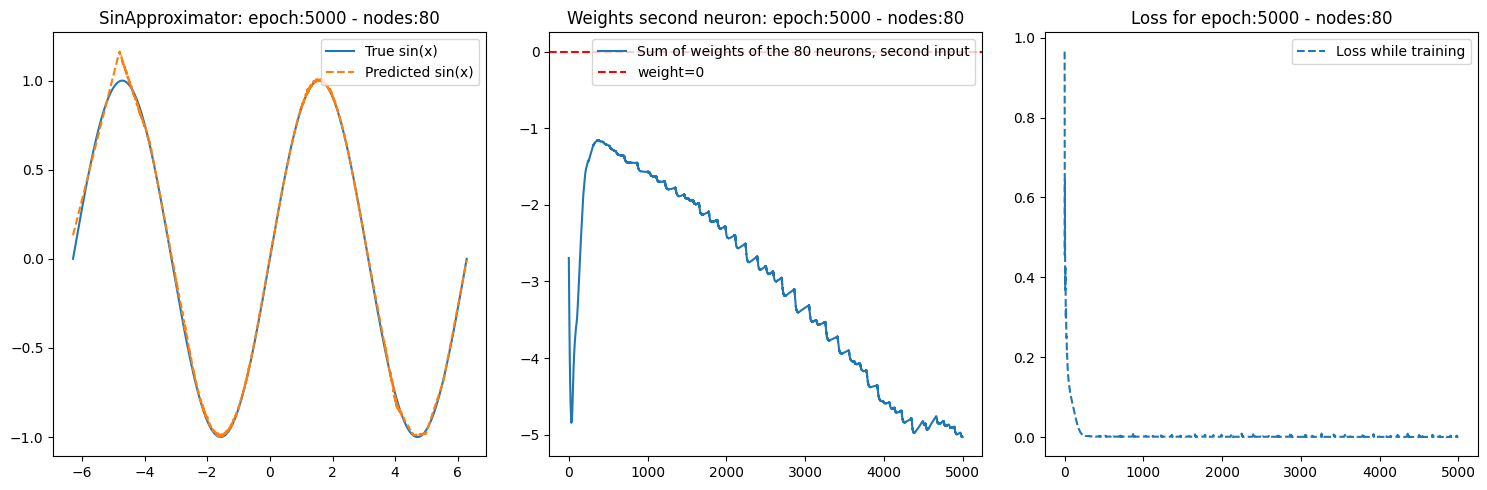

5000 90


In [ ]:
for epoch_number in range(1000, 10000, 1000):
    for nodes in range(10, 100, 10):
        
        print(epoch_number, nodes)
        
        model = SinApproximator(nodes=nodes)
        inputs, targets = generate_data()

        # Train the model
        weights_b, losses = train(model, inputs, targets, num_epochs=epoch_number)


        print(losses, weights_b)

        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

        # Evaluate the model
        with torch.no_grad():
            predictions = model(inputs).numpy()
            x_values = inputs[:, 0].numpy()

            axes[0].plot(x_values, targets.numpy(), label="True sin(x)")
            axes[0].plot(x_values, predictions, label="Predicted sin(x)", linestyle="dashed")
            axes[0].set_title(f"SinApproximator: epoch:{epoch_number} - nodes:{nodes}")
            axes[0].legend()

            axes[1].plot(weights_b, label=f"Sum of weights of the {nodes} neurons, second input")
            axes[1].set_title(f"Weights second neuron: epoch:{epoch_number} - nodes:{nodes}")
            axes[1].axhline(y=0, color='red', linestyle='--', label='weight=0')

            axes[1].legend()

            axes[2].plot(losses, label="Loss while training", linestyle="dashed")
            axes[2].set_title(f"Loss for epoch:{epoch_number} - nodes:{nodes}")
            axes[2].legend()

            # Adjust layout for better spacing
            plt.tight_layout()

            plt.show()
